### Problem statement:-
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn


## Steps:-
1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Building the model
4. Evaluate the model

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 100)

# Reading and understanding the data

In [3]:
# Reading the dataset
Tele_df = pd.read_csv('telecom_churn_data.csv')
Tele_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,...,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,...,0.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,...,NaN,56.0,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
Tele_df.shape

(99999, 226)

In [5]:
Tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
Tele_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,...,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,...,0.659363,192.600982,200.981292,197.526489,192.734315,51.904956,51.229937,50.170154,44.719701,121.396219,128.995847,135.410689,136.056613,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186,150.856393,155.318705,151.184830,147.995390,162.780544,157.492308,156.537048,158.681454,14.230438,14.264986,13.270996,13.457549,5.448946,7.533

### Step 1: Data preparation "Filter high-value customers"

We need to predict churn only for high-value customers. High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

Creation of column `avg_recharge_amt` by summing total recharge amount of month 6 and 7. Then taking the average of the sum.

In [7]:
Tele_df['total_rech_data_amt_6'] = Tele_df['total_rech_data_6'] * Tele_df['av_rech_amt_data_6']
Tele_df['total_rech_data_amt_7'] = Tele_df['total_rech_data_7'] * Tele_df['av_rech_amt_data_7']
# Total average is calculated using above mentioned formula.
Tele_df['avg_recharge_amt'] =(Tele_df['total_rech_amt_6'].fillna(0) + Tele_df['total_rech_amt_7'].fillna(0) + Tele_df['total_rech_data_amt_6'].fillna(0) + Tele_df['total_rech_data_amt_7'].fillna(0))/2

#Tele_df['avg_recharge_amt'] = (Tele_df['total_rech_amt_6'] + Tele_df['total_rech_amt_7'])/2

Identifying 70th percentile of the avg_recharge_amt

In [8]:
X = Tele_df['avg_recharge_amt'].quantile(0.7)
X

478.0

Filter the customers, who have recharged more than or equal to X.

In [9]:
Tele_df = Tele_df[Tele_df['avg_recharge_amt'] >= X]
Tele_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,avg_recharge_amt
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,252.0,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,559.0
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,...,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00,NaN,NaN,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.00,378.09,288.18,63.04,60.71,116.56,...,69.0,NaN,0.00,356.00,0.03,0.00,0.00,750.95,11.94,0.00,NaN,0.00,19.83,NaN,NaN,0.00,0.00,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00,NaN,354.0,696.0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,983.39,869.89,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4.48,6.16,23.34,29.98,91.81,87.93,104.81,107.54,0.75,0.00,1.58,0.00,0.0,0.0,0.00,0.00,97.04,94.09,129.74,137.53,97.93,...,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,720,0.00,0.00,0.00,0.00,NaN,NaN,640.0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,89.36,205.89,111.88,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,48.96,50.66,33.58,15.74,82.94,83.01,148.56,83.73,0.00,0.00,0.00,2.45,0.0,0.0,17.71,4.08,131.91,133.68,182.14,101.93,0.00,...,270.0,252.0,0.00,0.48,0.01,13.93,0.00,599.09,1009.92,314.74,NaN,306.57,197.27,212.17,NaN,301.78,150.67,212.17,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,NaN,1.0,1.0,1.0,604,40.45,51.86,0.00,0.00,NaN,712.0,583.0


In [10]:
Tele_df.shape

(30001, 229)

We can see that around 30k rows after filtering

# Handling missing values

#### Handling missing values in columns

In [11]:
# Finding percent of missing values in columns
Tele_df_miss_cols = (round(((Tele_df.isnull().sum()/len(Tele_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
Tele_df_miss_cols

,null
av_rech_amt_data_9,49.27
arpu_2g_9,49.27
date_of_last_rech_data_9,49.27
count_rech_2g_9,49.27
night_pck_user_9,49.27
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [12]:
# Columns with more than 30% missing values
col_list_missing_30 = list(Tele_df_miss_cols.index[Tele_df_miss_cols['null'] > 30])

In [13]:
# Deleting columns having more than 30% missing values
Tele_df = Tele_df.drop(col_list_missing_30, axis=1)

In [14]:
Tele_df.shape

(30001, 187)

#### This analysis doesnt require date columns hence deleting for better analysis

In [15]:
# List of the date columns
date_cols = [k for k in Tele_df.columns.to_list() if 'date' in k]
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [16]:
# Dropping the date columns
Tele_df = Tele_df.drop(date_cols, axis=1)

In [17]:
#Dropping circle_id column, this column has only one unique value so there wont be much impact on data analysis.

In [18]:
# Drop circle_id column
Tele_df = Tele_df.drop('circle_id', axis=1)

In [19]:
Tele_df.shape

(30001, 178)

#### Handling missing values in rows

In [20]:
# Rows having more than 50% missing values
Tele_df_miss_rows_50 = Tele_df[(Tele_df.isnull().sum(axis=1)) > (len(Tele_df.columns)//2)]
Tele_df_miss_rows_50.shape

(224, 178)

In [21]:
# Deleting rows with over 50% missing values
Tele_df = Tele_df.drop(Tele_df_miss_rows_50.index)
Tele_df.shape

(29777, 178)

In [22]:
# Checking the missing values in columns again
Tele_df_miss_cols = (round(((Tele_df.isnull().sum()/len(Tele_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
Tele_df_miss_cols

,null
loc_ic_mou_9,5.63
og_others_9,5.63
loc_og_t2t_mou_9,5.63
loc_ic_t2t_mou_9,5.63
loc_og_t2m_mou_9,5.63
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


Seems like all the types of calls for the month of September (9) have missing values, Lets check the records for Sep(9), in which there are missing values

In [23]:
# Listing the columns of Sep(9)
print(((Tele_df_miss_cols[Tele_df_miss_cols['null'] == 5.32]).index).to_list())

[]


In [24]:
# Creation of a dataframe with the condition where there are null values for MOU Sep(9)
Tele_df_null_mou_9 = Tele_df[(Tele_df['loc_og_t2m_mou_9'].isnull()) & (Tele_df['loc_ic_t2f_mou_9'].isnull()) & (Tele_df['roam_og_mou_9'].isnull()) & (Tele_df['std_ic_t2m_mou_9'].isnull()) &
  (Tele_df['loc_og_t2t_mou_9'].isnull()) & (Tele_df['std_ic_t2t_mou_9'].isnull()) & (Tele_df['loc_og_t2f_mou_9'].isnull()) & (Tele_df['loc_ic_mou_9'].isnull()) &
  (Tele_df['loc_og_t2c_mou_9'].isnull()) & (Tele_df['loc_og_mou_9'].isnull()) & (Tele_df['std_og_t2t_mou_9'].isnull()) & (Tele_df['roam_ic_mou_9'].isnull()) &
  (Tele_df['loc_ic_t2m_mou_9'].isnull()) & (Tele_df['std_og_t2m_mou_9'].isnull()) & (Tele_df['loc_ic_t2t_mou_9'].isnull()) & (Tele_df['std_og_t2f_mou_9'].isnull()) & 
  (Tele_df['std_og_t2c_mou_9'].isnull()) & (Tele_df['og_others_9'].isnull()) & (Tele_df['std_og_mou_9'].isnull()) & (Tele_df['spl_og_mou_9'].isnull()) & 
  (Tele_df['std_ic_t2f_mou_9'].isnull()) & (Tele_df['isd_og_mou_9'].isnull()) & (Tele_df['std_ic_mou_9'].isnull()) & (Tele_df['offnet_mou_9'].isnull()) & 
  (Tele_df['isd_ic_mou_9'].isnull()) & (Tele_df['ic_others_9'].isnull()) & (Tele_df['std_ic_t2o_mou_9'].isnull()) & (Tele_df['onnet_mou_9'].isnull()) & 
  (Tele_df['spl_ic_mou_9'].isnull())]

Tele_df_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,...,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.1,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,559.0
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,...,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,1185.0
67,7000800341,0.0,0.0,0.0,218.818,386.515,386.502,0.0,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,...,0.00,0.00,85.83,NaN,3,4,3,0,252,455,455,0,252,455,455,0,252,455,0,0,42.89,19.07,0.00,0.0,2042.38,3189.85,0.00,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1158,126.21,745.73,1010.15,0.00,707.0
86,7000175867,0.0,0.0,0.0,319.700,56.080,1.030,0.0,141.76,11.23,0.00,NaN,182.76,32.79,1.71,NaN,0.00,14.56,0.00,NaN,0.00,2.26,1.71,NaN,52.54,10.63,0.00,NaN,7.54,14.70,0.00,NaN,2.13,3.33,0.00,NaN,0.0,0.0,0.0,NaN,62.23,28.66,0.00,NaN,89.21,0.00,0.00,NaN,173.08,13.10,...,0.00,0.00,0.00,NaN,7,4,2,5,330,110,0,0,110,110,0,0,0,0,0,0,39.39,0.00,0.00,0.0,1883.48,0.00,0.00,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,465,0.00,394.62,1526.51,0.00,528.0
111,7001300706,0.0,0.0,0.0,596.301,146.073,0.000,0.0,55.19,3.26,NaN,NaN,45.51,12.34,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,55.19,3.26,NaN,NaN,43.83,12.34,NaN,NaN,0.00,0.00,NaN,NaN,0.0,0.0,NaN,NaN,99.03,15.61,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,...,0.15,0.00,NaN,NaN,12,8,5,2,704,178,0,0,154,50,0,0,154,30,0,0,284.50,0.00,0.00,0.0,0.00,0.00,0.00,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,332,0.00,0.00,0.00,0.00,644.0


In [25]:
Tele_df_null_mou_9.shape

(1677, 178)

In [26]:
# Deleting records where MOU for Sep(9) are null
Tele_df = Tele_df.drop(Tele_df_null_mou_9.index)

In [27]:
# after deleting cheking for the percent of missing values in columns
Tele_df_miss_cols = (round(((Tele_df.isnull().sum()/len(Tele_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
Tele_df_miss_cols

,null
og_others_6,0.8
loc_ic_mou_6,0.8
loc_og_mou_6,0.8
loc_ic_t2f_mou_6,0.8
std_og_t2f_mou_6,0.8
...,...
total_og_mou_9,0.0
total_og_mou_8,0.0
total_og_mou_7,0.0
total_og_mou_6,0.0


Seems like MOU for the types of calls for the month of Aug (8) have missing values & Lets check the records for the MOU for Aug(8), in which these coulmns have missing values together.

In [28]:
# Listing of the columns of MOU Aug(8)
print(((Tele_df_miss_cols[Tele_df_miss_cols['null'] == 0.55]).index).to_list())

[]


In [29]:
# Creation of a dataframe with the condition, where there are null values for MOU for Aug(8)
Tele_df_null_mou_8 = Tele_df[(Tele_df['loc_og_t2m_mou_8'].isnull()) & (Tele_df['loc_ic_t2f_mou_8'].isnull()) & (Tele_df['roam_og_mou_8'].isnull()) & (Tele_df['std_ic_t2m_mou_8'].isnull()) &
  (Tele_df['loc_og_t2t_mou_8'].isnull()) & (Tele_df['std_ic_t2t_mou_8'].isnull()) & (Tele_df['loc_og_t2f_mou_8'].isnull()) & (Tele_df['loc_ic_mou_8'].isnull()) &
  (Tele_df['loc_og_t2c_mou_8'].isnull()) & (Tele_df['loc_og_mou_8'].isnull()) & (Tele_df['std_og_t2t_mou_8'].isnull()) & (Tele_df['roam_ic_mou_8'].isnull()) &
  (Tele_df['loc_ic_t2m_mou_8'].isnull()) & (Tele_df['std_og_t2m_mou_8'].isnull()) & (Tele_df['loc_ic_t2t_mou_8'].isnull()) & (Tele_df['std_og_t2f_mou_8'].isnull()) & 
  (Tele_df['std_og_t2c_mou_8'].isnull()) & (Tele_df['og_others_8'].isnull()) & (Tele_df['std_og_mou_8'].isnull()) & (Tele_df['spl_og_mou_8'].isnull()) & 
  (Tele_df['std_ic_t2f_mou_8'].isnull()) & (Tele_df['isd_og_mou_8'].isnull()) & (Tele_df['std_ic_mou_8'].isnull()) & (Tele_df['offnet_mou_8'].isnull()) & 
  (Tele_df['isd_ic_mou_8'].isnull()) & (Tele_df['ic_others_8'].isnull()) & (Tele_df['std_ic_t2o_mou_8'].isnull()) & (Tele_df['onnet_mou_8'].isnull()) & 
  (Tele_df['spl_ic_mou_8'].isnull())]

Tele_df_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,...,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt
788,7000636808,0.0,0.0,0.0,532.742,546.756,0.000,269.274,1173.39,891.83,NaN,149.34,61.59,137.14,NaN,428.36,0.00,1.48,NaN,0.00,0.0,14.43,NaN,0.0,31.06,27.49,NaN,7.39,34.66,60.86,NaN,34.23,0.0,0.0,NaN,0.0,0.0,0.0,NaN,5.58,65.73,88.36,NaN,41.63,1142.33,854.08,NaN,141.94,26.93,67.24,...,3.89,0.00,NaN,0.00,10,7,4,5,714,494,0,336,128,128,0,130,128,0,0,130,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,936,0.00,0.00,0.00,0.0,604.0
1138,7000069975,0.0,0.0,0.0,405.189,61.136,140.144,224.626,26.81,NaN,NaN,0.00,519.28,NaN,NaN,0.00,7.01,NaN,NaN,8.73,0.0,NaN,NaN,0.0,18.68,NaN,NaN,0.00,23.53,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.00,42.21,NaN,NaN,0.00,8.13,NaN,NaN,0.00,495.74,NaN,...,0.00,NaN,NaN,0.00,7,3,2,3,498,49,164,262,152,49,164,252,65,0,0,252,15.97,103.69,124.99,158.78,837.95,816.99,610.85,1110.51,1,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,212,716.21,779.19,147.47,0.0,977.5
1623,7000494286,0.0,0.0,0.0,198.890,129.494,0.000,261.423,0.00,0.46,NaN,0.00,0.00,11.08,NaN,281.48,0.00,3.96,NaN,0.00,0.0,3.93,NaN,0.0,0.00,0.46,NaN,0.00,0.00,0.21,NaN,2.31,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.00,0.00,0.68,NaN,2.31,0.00,0.00,NaN,0.00,0.00,6.93,...,0.00,0.00,NaN,1.75,20,9,5,16,225,150,0,304,25,50,0,30,25,50,0,30,985.07,442.63,0.00,362.89,0.00,11.63,0.00,0.00,0,0,0,0,18,7,0,3,0,0,0,0,0,0,0,0,383,0.00,15.79,0.00,0.0,4850.0
1877,7001874888,0.0,0.0,0.0,50.779,103.074,-5.000,47.149,0.00,0.00,NaN,10.54,35.24,3.76,NaN,32.96,0.00,0.00,NaN,0.00,0.0,0.00,NaN,0.0,0.00,0.00,NaN,7.49,23.06,3.76,NaN,27.06,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.00,23.06,3.76,NaN,34.56,0.00,0.00,NaN,3.04,8.30,0.00,...,0.00,0.00,NaN,0.00,4,13,2,3,25,117,0,60,25,30,0,30,0,0,0,30,121.87,216.51,0.00,0.00,0.00,257.53,0.00,0.00,0,0,0,0,1,6,0,0,0,0,0,0,0,0,0,0,1335,0.00,0.00,0.00,0.0,509.5
2063,7002171198,0.0,0.0,0.0,248.434,165.596,248.347,412.868,0.00,0.00,NaN,0.00,0.00,0.00,NaN,212.09,0.00,0.00,NaN,0.00,0.0,0.00,NaN,0.0,0.00,0.00,NaN,0.00,0.00,0.00,NaN,9.93,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.00,0.00,0.00,NaN,9.93,0.00,0.00,NaN,0.00,0.00,0.00,...,0.40,0.26,NaN,0.00,6,3,4,10,294,196,294,501,98,98,98,154,0,98,0,0,1283.60,1064.89,1607.88,920.22,0.00,0.00,0.00,0.00,0,0,0,1,3,2,3,1,0,0,0,0,0,0,0,0,331,0.00,0.00,0.00,0.0,882.0


In [30]:
# Deleting the records for which MOU for Aug(8) are null
Tele_df = Tele_df.drop(Tele_df_null_mou_8.index)

In [31]:
# Again cheking percent of missing values in columns
Tele_df_miss_cols = (round(((Tele_df.isnull().sum()/len(Tele_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
Tele_df_miss_cols

,null
roam_ic_mou_6,0.65
spl_og_mou_6,0.65
og_others_6,0.65
loc_ic_t2t_mou_6,0.65
loc_og_t2m_mou_6,0.65
...,...
isd_og_mou_9,0.00
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00


Seems like MOU for all the types of calls for the month of Jun (6) have missing values & lets check the records for the MOU for Jun(6), in which these coulmns have missing values together.

In [32]:
# Listing of the columns of MOU Jun(6)
print(((Tele_df_miss_cols[Tele_df_miss_cols['null'] == 0.44]).index).to_list())

[]


In [33]:
# Creation of a dataframe with the condition, where there are null values for MOU for Jun(6)
Tele_df_null_mou_6 = Tele_df[(Tele_df['loc_og_t2m_mou_6'].isnull()) & (Tele_df['loc_ic_t2f_mou_6'].isnull()) & (Tele_df['roam_og_mou_6'].isnull()) & (Tele_df['std_ic_t2m_mou_6'].isnull()) &
  (Tele_df['loc_og_t2t_mou_6'].isnull()) & (Tele_df['std_ic_t2t_mou_6'].isnull()) & (Tele_df['loc_og_t2f_mou_6'].isnull()) & (Tele_df['loc_ic_mou_6'].isnull()) &
  (Tele_df['loc_og_t2c_mou_6'].isnull()) & (Tele_df['loc_og_mou_6'].isnull()) & (Tele_df['std_og_t2t_mou_6'].isnull()) & (Tele_df['roam_ic_mou_6'].isnull()) &
  (Tele_df['loc_ic_t2m_mou_6'].isnull()) & (Tele_df['std_og_t2m_mou_6'].isnull()) & (Tele_df['loc_ic_t2t_mou_6'].isnull()) & (Tele_df['std_og_t2f_mou_6'].isnull()) & 
  (Tele_df['std_og_t2c_mou_6'].isnull()) & (Tele_df['og_others_6'].isnull()) & (Tele_df['std_og_mou_6'].isnull()) & (Tele_df['spl_og_mou_6'].isnull()) & 
  (Tele_df['std_ic_t2f_mou_6'].isnull()) & (Tele_df['isd_og_mou_6'].isnull()) & (Tele_df['std_ic_mou_6'].isnull()) & (Tele_df['offnet_mou_6'].isnull()) & 
  (Tele_df['isd_ic_mou_6'].isnull()) & (Tele_df['ic_others_6'].isnull()) & (Tele_df['std_ic_t2o_mou_6'].isnull()) & (Tele_df['onnet_mou_6'].isnull()) & 
  (Tele_df['spl_ic_mou_6'].isnull())]

Tele_df_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,...,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,39.44,179.18,57.68,NaN,0.00,0.00,0.0,NaN,0.00,0.00,0.00,NaN,34.23,149.69,6.31,NaN,32.18,101.63,29.41,NaN,0.91,29.86,28.26,NaN,0.0,3.90,0.00,NaN,67.33,281.19,63.99,NaN,0.00,0.00,0.00,NaN,0.00,...,NaN,0.00,3.39,0.0,4,5,3,3,0,1154,750,0,0,1000,750,0,0,0,750,0,0.0,96.48,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,654.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,845.11,923.58,828.29,NaN,0.00,0.00,0.0,NaN,0.00,0.00,0.00,NaN,28.78,7.46,64.73,NaN,78.78,584.76,490.71,NaN,21.58,9.43,0.00,NaN,0.0,0.00,2.78,NaN,129.14,601.66,555.44,NaN,404.71,191.49,507.26,NaN,722.01,...,NaN,0.00,0.00,0.0,4,12,24,20,0,970,1104,1214,0,154,154,250,0,50,50,0,0.0,565.78,2108.66,0.00,0.00,0.00,0.00,0.00,0,1,1,0,0,0,2,0,0,0,0,0,0,0,1,0,424,0.00,0.00,0.00,0.00,562.0
414,7000919353,0.0,0.0,0.0,20.000,290.490,132.698,199.047,NaN,23.56,15.66,1.96,NaN,92.63,103.33,165.81,NaN,8.51,0.61,6.2,NaN,4.08,0.00,0.58,NaN,19.08,6.24,1.96,NaN,22.68,12.51,13.91,NaN,1.68,1.56,3.98,NaN,0.0,1.83,14.81,NaN,43.44,20.33,19.86,NaN,3.60,9.41,0.00,NaN,50.64,...,NaN,0.89,2.44,0.0,0,9,11,15,0,339,156,225,0,198,27,27,0,198,25,20,0.0,120.67,262.17,41.93,0.00,0.00,0.00,0.00,0,1,0,0,0,2,4,3,0,0,0,0,0,0,0,0,429,0.00,0.00,0.00,0.00,541.5
423,7000635248,0.0,0.0,0.0,213.802,304.194,149.710,329.643,NaN,0.00,0.00,0.00,NaN,10.03,1.45,0.34,NaN,0.00,0.00,0.0,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.58,0.33,NaN,0.00,0.00,0.00,NaN,0.0,0.00,0.00,NaN,0.00,0.58,0.33,NaN,0.00,0.00,0.00,NaN,0.00,...,NaN,0.00,0.00,0.0,4,4,3,3,252,591,0,382,252,339,0,252,252,0,0,0,3.3,38.45,0.00,4.52,669.36,837.18,0.00,423.59,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,945,73.55,266.94,63.04,0.00,673.5
934,7002152278,0.0,0.0,0.0,48.000,764.152,500.030,194.400,NaN,14.24,17.48,7.69,NaN,16.99,76.86,43.64,NaN,0.00,8.81,0.0,NaN,0.00,1.56,0.00,NaN,0.08,17.48,7.69,NaN,16.99,63.23,39.99,NaN,0.00,12.08,3.65,NaN,0.0,0.00,0.00,NaN,17.08,92.79,51.34,NaN,14.16,0.00,0.00,NaN,0.00,...,NaN,0.00,0.00,0.0,3,4,9,4,0,1302,150,108,0,550,150,54,0,0,150,0,0.0,0.31,38.77,78.66,0.00,1045.79,245.91,471.48,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2,1,490,188.83,215.00,0.00,24.18,777.0


In [34]:
# Deleting the null values record of where MOU for Jun(6)
Tele_df = Tele_df.drop(Tele_df_null_mou_6.index)

In [35]:
# cheking percent of missing values in columns
Tele_df_miss_cols = (round(((Tele_df.isnull().sum()/len(Tele_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
Tele_df_miss_cols

,null
loc_ic_t2f_mou_7,0.25
isd_ic_mou_7,0.25
loc_og_t2f_mou_7,0.25
loc_og_t2c_mou_7,0.25
loc_og_mou_7,0.25
...,...
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00
og_others_6,0.00


Seems like MOU for all the types of calls for the month of July (7) have missing values, Lets check the records for the MOU for Jul(7), in which these coulmns have missing values.

In [36]:
# Listing of columns of MOU Jul(7)
print(((Tele_df_miss_cols[Tele_df_miss_cols['null'] == 0.12]).index).to_list())

[]


In [37]:
# Creation of a dataframe with the condition to find null values in which MOU for Jul(7)
Tele_df_null_mou_7 = Tele_df[(Tele_df['loc_og_t2m_mou_7'].isnull()) & (Tele_df['loc_ic_t2f_mou_7'].isnull()) & (Tele_df['roam_og_mou_7'].isnull()) & (Tele_df['std_ic_t2m_mou_7'].isnull()) &
  (Tele_df['loc_og_t2t_mou_7'].isnull()) & (Tele_df['std_ic_t2t_mou_7'].isnull()) & (Tele_df['loc_og_t2f_mou_7'].isnull()) & (Tele_df['loc_ic_mou_7'].isnull()) &
  (Tele_df['loc_og_t2c_mou_7'].isnull()) & (Tele_df['loc_og_mou_7'].isnull()) & (Tele_df['std_og_t2t_mou_7'].isnull()) & (Tele_df['roam_ic_mou_7'].isnull()) &
  (Tele_df['loc_ic_t2m_mou_7'].isnull()) & (Tele_df['std_og_t2m_mou_7'].isnull()) & (Tele_df['loc_ic_t2t_mou_7'].isnull()) & (Tele_df['std_og_t2f_mou_7'].isnull()) & 
  (Tele_df['std_og_t2c_mou_7'].isnull()) & (Tele_df['og_others_7'].isnull()) & (Tele_df['std_og_mou_7'].isnull()) & (Tele_df['spl_og_mou_7'].isnull()) & 
  (Tele_df['std_ic_t2f_mou_7'].isnull()) & (Tele_df['isd_og_mou_7'].isnull()) & (Tele_df['std_ic_mou_7'].isnull()) & (Tele_df['offnet_mou_7'].isnull()) & 
  (Tele_df['isd_ic_mou_7'].isnull()) & (Tele_df['ic_others_7'].isnull()) & (Tele_df['std_ic_t2o_mou_7'].isnull()) & (Tele_df['onnet_mou_7'].isnull()) & 
  (Tele_df['spl_ic_mou_7'].isnull())]

Tele_df_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,...,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt
2452,7001556991,0.0,0.0,0.0,124.215,232.220,130.427,148.291,0.0,NaN,0.0,0.0,0.00,NaN,0.0,0.0,0.0,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.00,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,NaN,0.2,0.00,9,4,3,4,150,275,154,175,25,154,154,175,25,154,154,0,582.58,797.84,661.29,862.47,0.00,0.00,0.00,0.00,0,1,1,1,6,1,0,0,0,0,0,0,0,1,0,0,1165,0.00,0.00,0.00,0.0,1075.0
2533,7000425942,0.0,0.0,0.0,130.450,220.876,130.413,148.293,0.0,NaN,0.0,0.0,0.00,NaN,0.0,0.0,0.0,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.00,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,NaN,0.0,0.00,4,9,2,4,154,254,154,175,154,154,154,175,0,154,154,0,527.53,536.78,550.49,982.23,0.00,0.00,0.00,0.00,1,1,1,1,0,7,0,0,0,0,0,0,0,0,0,0,710,0.00,0.00,0.00,0.0,1597.0
3310,7000341220,0.0,0.0,0.0,240.199,240.143,205.766,173.259,0.0,NaN,0.0,0.0,0.00,NaN,0.0,0.0,0.0,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.00,NaN,5.68,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,NaN,0.0,0.00,9,9,7,6,287,287,246,205,41,41,41,164,41,41,41,0,0.00,0.00,0.00,0.00,1022.78,880.82,884.65,826.86,0,0,0,0,0,0,0,0,0,0,0,1,7,7,6,1,1064,0.00,0.00,0.00,0.0,2296.0
4439,7001049672,0.0,0.0,0.0,163.846,189.673,0.000,0.000,0.0,NaN,0.0,0.0,5.03,NaN,0.0,0.0,0.0,NaN,6.88,0.76,5.03,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,5.03,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,NaN,0.0,0.00,8,7,3,5,195,229,0,0,145,154,0,0,25,25,0,0,253.73,21.92,0.00,0.00,1407.39,1193.50,0.00,0.00,0,1,0,0,3,3,0,0,1,0,0,0,0,0,0,0,642,0.00,553.04,1319.05,0.0,1110.0
5025,7001688880,0.0,0.0,0.0,129.030,130.743,130.732,214.300,0.0,NaN,0.0,0.0,0.75,NaN,0.0,0.0,0.0,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.00,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,NaN,0.0,0.76,1,3,1,3,152,154,154,252,152,154,154,252,152,154,154,0,5.44,37.39,41.89,26.55,680.52,966.54,606.86,1066.24,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,185,368.84,439.15,133.67,0.0,534.0


In [38]:
# Deleting the null value records for MOU for Jul(7) 
Tele_df = Tele_df.drop(Tele_df_null_mou_7.index)

In [39]:
# Cheking percent of missing values in columns
Tele_df_miss_cols = (round(((Tele_df.isnull().sum()/len(Tele_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
Tele_df_miss_cols

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


It is evident that there are no more missing values in any columns.

In [40]:
Tele_df.shape

(27629, 178)

In [41]:
# Checking percentage of rows where we have deleted while handling the missing values
round((1- (len(Tele_df.index)/30011)),2)

0.08

We have lost around 7% records while handling missing values. But we have suffiecent data to do our analysis.

### Step 2. Data Preparation "Tag churners and remove attributes of the churn phase"


Tagging the churned customers (churn=1, else 0): Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

In [42]:
Tele_df['churn'] = np.where((Tele_df['total_ic_mou_9']==0) & (Tele_df['total_og_mou_9']==0) & (Tele_df['vol_2g_mb_9']==0) & (Tele_df['vol_3g_mb_9']==0), 1, 0)

In [43]:
Tele_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,...,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.0,0.00,0.00,0.0,0.0,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,...,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.00,356.00,0.03,0.00,0.0,750.95,11.94,0.00,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,696.0,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,983.39,869.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,29.98,91.81,87.93,104.81,107.54,0.75,0.0,1.58,0.00,0.0,0.0,0.00,0.00,97.04,94.09,129.74,137.53,97.93,125.94,61.79,131.64,665.36,808.74,...,0.00,0.00,0.00,22,26,27,17,600,680,718,680,50,50,50,50,30,20,50,30,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0
23,7000887461,0.0,0.0,0.0,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,89.36,205.89,111.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.96,50.66,33.58,15.74,82.94,83.01,148.56,83.73,0.00,0.0,0.00,2.45,0.0,0.0,17.71,4.08,131.91,133.68,182.14,101.93,0.00,0.00,0.00,0.00,2.36,6.35,...,5.35,13.06,0.00,3,5,4,4,0,454,439,252,0,179,179,252,0,179,0,0,0.00,0.48,0.01,13.93,0.0,599.09,1009.92,314.74,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,604,40.45,51.86,0.00,0.0,583.0,0
33,7000149764,0.0,0.0,0.0,977.020,2362.833,409.230,799.356,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.65,0.20,0.26,7,14,1,6,1058,2806,455,1007,252,1255,455,655,252,0,455,0,87.05,57.76,7.97,30.92,3509.9,8154.65,7701.01,5588.11,0,0,0,0,0,0,0,0,4,5,1,2,1,3,0,0,1328,358.10,2706.83,1714.67,0.0,14786.5,0
38,7000815202,0.0,0.0,0.0,363.987,486.558,393.909,391.709,248.99,619.96,666.38,494.79,88.86,50.58,97.81,213.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.88,17.33,9.48,16.39,33.76,16.19,18.96,49.96,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,63.64,33.53,28.44,66.36,219.11,602.63,656.89,478.39,55.09,34.38,...,0.00,0.00,0.00,27,22,6,15,420,636,416,487,30,110,130,130,20,20,130,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1155,0.00,0.00,0.00,0.0,528.0,0


#### Deleting the attributes corresponding to the churn phase

In [44]:
# all columns for churn month(9)
col_9 = [col for col in Tele_df.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [45]:
# Deleting the churn month columns
Tele_df = Tele_df.drop(col_9, axis=1)

In [46]:
# Dropping sep_vbc_3g column
Tele_df = Tele_df.drop('sep_vbc_3g', axis=1)

#### Checking churn percentage

In [47]:
round(100*(Tele_df['churn'].mean()),2)

2.75

There is a very little percentage of churn rate and We will take care of the class imbalance later.

## Handling Outliers or Outliers treatment

In the filtered dataset except mobile_number & churn columns rest of the columns are numeric types so converting mobile_number and churn datatype to object.

In [48]:
Tele_df['mobile_number'] = Tele_df['mobile_number'].astype(object)
Tele_df['churn'] = Tele_df['churn'].astype(object)

In [49]:
Tele_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27629 entries, 8 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int64(25), object(2)
memory usage: 28.9+ MB


In [50]:
# List of the numeric columns
numeric_cols = Tele_df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_recharge_amt'],
      dtype='object', length=134)


In [51]:
# Deletong the outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = Tele_df[col].quantile(0.10)
    q3 = Tele_df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset to data
    data = Tele_df.loc[(Tele_df[col] > range_low) & (Tele_df[col] < range_high)]

data.shape

(27029, 136)

### Derive new features

In [52]:
# List of the columns of total MOU, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

#### Deriving new column `decrease_mou_action`
This column shows whether the minutes of usage of the customer has decreased in the action phase campared to the good phase.

In [53]:
# Total MOU at good phase both incoming & outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [54]:
# Avg. MOU at action phase
# We can take average of both July & Aug as these two months fall under action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [55]:
# Difference of avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [56]:
# Finding whether the MOU has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [57]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,...,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_recharge_amt,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.00,...,16.54,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,696.0,0,612.22,324.125,-288.095,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.0,0.0,0.0,763.29,934.69,938.79,0.00,...,261.04,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,640.0,0,1067.43,1245.130,177.700,0
23,7000887461,0.0,0.0,0.0,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.0,0.0,0.0,0.0,0.0,0.0,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,0.0,0.0,0.0,2.36,6.35,39.61,0.00,...,298.33,0.0,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,454,439,0,179,179,0,179,0,0.0,0.48,0.01,0.0,599.09,1009.92,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,583.0,0,253.96,450.370,196.410,0
38,7000815202,0.0,0.0,0.0,363.987,486.558,393.909,248.99,619.96,666.38,88.86,50.58,97.81,0.0,0.0,0.0,0.0,0.0,0.0,29.88,17.33,9.48,33.76,16.19,18.96,0.00,0.00,0.00,0.0,0.0,0.00,63.64,33.53,28.44,219.11,602.63,656.89,55.09,34.38,78.84,0.00,0.00,0.00,0.0,0.0,0.0,274.21,637.01,735.74,0.00,...,49.64,0.0,0.0,0.0,0.00,19.08,1.20,0.00,0.00,0.00,27,22,6,420,636,416,30,110,130,20,20,130,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1155,0.00,0.00,0.00,528.0,0,408.65,776.155,367.505,0
41,7000721289,0.0,0.0,0.0,482.832,425.764,229.769,86.39,118.88,80.44,232.36,280.78,136.69,0.0,0.0,0.0,0.0,0.0,0.0,86.39,118.88,80.44,142.69,174.91,107.88,54.14,10.66,14.88,0.0,0.0,0.00,283.24,304.46,203.21,0.00,0.00,0.00,0.00,0.00,0.00,34.68,94.89,13.18,0.0,0.0,0.0,34.68,94.89,13.18,0.79,...,206.94,0.0,0.0,0.0,194.31,220.99,145.94,0.56,0.00,0.35,4,4,3,496,510,410,150,150,150,150,150,110,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,2010,0.00,0.00,0.00,503.0,0,597.07,649.990,52.920,0


#### Further deriving new column `decr_rech_num_action`
This column indicates whether the number of recharge of the customer has decreased in the action phase compared to the good phase.

In [58]:
# Avg rech number in action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [59]:
# Difference between total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [60]:
# Finding if rech_num has decreased in action phase or not
data['decr_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [61]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,...,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_recharge_amt,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decr_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,696.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.0,0.0,0.0,763.29,934.69,938.79,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,640.0,0,1067.43,1245.130,177.700,0,26.5,4.5,0
23,7000887461,0.0,0.0,0.0,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.0,0.0,0.0,0.0,0.0,0.0,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,0.0,0.0,0.0,2.36,6.35,39.61,0.00,...,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,454,439,0,179,179,0,179,0,0.0,0.48,0.01,0.0,599.09,1009.92,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,583.0,0,253.96,450.370,196.410,0,4.5,1.5,0
38,7000815202,0.0,0.0,0.0,363.987,486.558,393.909,248.99,619.96,666.38,88.86,50.58,97.81,0.0,0.0,0.0,0.0,0.0,0.0,29.88,17.33,9.48,33.76,16.19,18.96,0.00,0.00,0.00,0.0,0.0,0.00,63.64,33.53,28.44,219.11,602.63,656.89,55.09,34.38,78.84,0.00,0.00,0.00,0.0,0.0,0.0,274.21,637.01,735.74,0.00,...,0.0,0.00,19.08,1.20,0.00,0.00,0.00,27,22,6,420,636,416,30,110,130,20,20,130,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1155,0.00,0.00,0.00,528.0,0,408.65,776.155,367.505,0,14.0,-13.0,1
41,7000721289,0.0,0.0,0.0,482.832,425.764,229.769,86.39,118.88,80.44,232.36,280.78,136.69,0.0,0.0,0.0,0.0,0.0,0.0,86.39,118.88,80.44,142.69,174.91,107.88,54.14,10.66,14.88,0.0,0.0,0.00,283.24,304.46,203.21,0.00,0.00,0.00,0.00,0.00,0.00,34.68,94.89,13.18,0.0,0.0,0.0,34.68,94.89,13.18,0.79,...,0.0,194.31,220.99,145.94,0.56,0.00,0.35,4,4,3,496,510,410,150,150,150,150,150,110,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,2010,0.00,0.00,0.00,503.0,0,597.07,649.990,52.920,0,3.5,-0.5,1


#### Deriving another  new column `decr_rech_amt_action`
This column shows whether the amount of recharge of the customer has incresed or decreased in the action phase compared to good phase.

In [62]:
# The Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

In [63]:
# The Difference of action phase rech amt & good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [64]:
# Checking if rech_amt has decreased in action phase
data['decr_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

In [65]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,...,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_recharge_amt,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decr_rech_num_action,avg_rech_amt_action,diff_rech_amt,decr_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.00,...,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,696.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.0,0.0,0.0,763.29,934.69,938.79,0.00,...,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,640.0,0,1067.43,1245.130,177.700,0,26.5,4.5,0,699.0,99.0,0
23,7000887461,0.0,0.0,0.0,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.0,0.0,0.0,0.0,0.0,0.0,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,0.0,0.0,0.0,2.36,6.35,39.61,0.00,...,3.74,0.00,5.35,13.06,3,5,4,0,454,439,0,179,179,0,179,0,0.0,0.48,0.01,0.0,599.09,1009.92,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,583.0,0,253.96,450.370,196.410,0,4.5,1.5,0,446.5,446.5,0
38,7000815202,0.0,0.0,0.0,363.987,486.558,393.909,248.99,619.96,666.38,88.86,50.58,97.81,0.0,0.0,0.0,0.0,0.0,0.0,29.88,17.33,9.48,33.76,16.19,18.96,0.00,0.00,0.00,0.0,0.0,0.00,63.64,33.53,28.44,219.11,602.63,656.89,55.09,34.38,78.84,0.00,0.00,0.00,0.0,0.0,0.0,274.21,637.01,735.74,0.00,...,1.20,0.00,0.00,0.00,27,22,6,420,636,416,30,110,130,20,20,130,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1155,0.00,0.00,0.00,528.0,0,408.65,776.155,367.505,0,14.0,-13.0,1,526.0,106.0,0
41,7000721289,0.0,0.0,0.0,482.832,425.764,229.769,86.39,118.88,80.44,232.36,280.78,136.69,0.0,0.0,0.0,0.0,0.0,0.0,86.39,118.88,80.44,142.69,174.91,107.88,54.14,10.66,14.88,0.0,0.0,0.00,283.24,304.46,203.21,0.00,0.00,0.00,0.00,0.00,0.00,34.68,94.89,13.18,0.0,0.0,0.0,34.68,94.89,13.18,0.79,...,145.94,0.56,0.00,0.35,4,4,3,496,510,410,150,150,150,150,150,110,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,2010,0.00,0.00,0.00,503.0,0,597.07,649.990,52.920,0,3.5,-0.5,1,460.0,-36.0,1


#### Deriving another new column `decrease_arpu_action`
This column indicates whether the average revenue per customer has decreased in the action phase compared to the good phase.

In [66]:
# Average revenue per customer in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

In [67]:
# Difference of good and action phase average revenue per customer
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [68]:
# Finding whether the average revenue per customer has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [69]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,...,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_recharge_amt,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decr_rech_num_action,avg_rech_amt_action,diff_rech_amt,decr_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.00,...,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,696.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.0,0.0,0.0,763.29,934.69,938.79,0.00,...,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,640.0,0,1067.43,1245.130,177.700,0,26.5,4.5,0,699.0,99.0,0,617.7565,103.3035,0
23,7000887461,0.0,0.0,0.0,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.0,0.0,0.0,0.0,0.0,0.0,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,0.0,0.0,0.0,2.36,6.35,39.61,0.00,...,13.06,3,5,4,0,454,439,0,179,179,0,179,0,0.0,0.48,0.01,0.0,599.09,1009.92,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,583.0,0,253.96,450.370,196.410,0,4.5,1.5,0,446.5,446.5,0,280.4315,206.0815,0
38,7000815202,0.0,0.0,0.0,363.987,486.558,393.909,248.99,619.96,666.38,88.86,50.58,97.81,0.0,0.0,0.0,0.0,0.0,0.0,29.88,17.33,9.48,33.76,16.19,18.96,0.00,0.00,0.00,0.0,0.0,0.00,63.64,33.53,28.44,219.11,602.63,656.89,55.09,34.38,78.84,0.00,0.00,0.00,0.0,0.0,0.0,274.21,637.01,735.74,0.00,...,0.00,27,22,6,420,636,416,30,110,130,20,20,130,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1155,0.00,0.00,0.00,528.0,0,408.65,776.155,367.505,0,14.0,-13.0,1,526.0,106.0,0,440.2335,76.2465,0
41,7000721289,0.0,0.0,0.0,482.832,425.764,229.769,86.39,118.88,80.44,232.36,280.78,136.69,0.0,0.0,0.0,0.0,0.0,0.0,86.39,118.88,80.44,142.69,174.91,107.88,54.14,10.66,14.88,0.0,0.0,0.00,283.24,304.46,203.21,0.00,0.00,0.00,0.00,0.00,0.00,34.68,94.89,13.18,0.0,0.0,0.0,34.68,94.89,13.18,0.79,...,0.35,4,4,3,496,510,410,150,150,150,150,150,110,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,2010,0.00,0.00,0.00,503.0,0,597.07,649.990,52.920,0,3.5,-0.5,1,460.0,-36.0,1,327.7665,-155.0655,1


#### Deriving one more new column `decrease_vbc_action`
This column shows whether the volume based cost of the customer has decreased in the action phase compared to the good phase.

In [70]:
# Volume based cost  in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

In [71]:
# Finding difference of good and action phase volume based cost 
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [72]:
# Checking whether the volume based cost has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [73]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,...,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_recharge_amt,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decr_rech_num_action,avg_rech_amt_action,diff_rech_amt,decr_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.00,...,14,437,601,120,90,154,30,50,0,10,0.0,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,696.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.0,0.0,0.0,763.29,934.69,938.79,0.00,...,27,600,680,718,50,50,50,30,20,50,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,640.0,0,1067.43,1245.130,177.700,0,26.5,4.5,0,699.0,99.0,0,617.7565,103.3035,0,0.000,0.000,0
23,7000887461,0.0,0.0,0.0,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.0,0.0,0.0,0.0,0.0,0.0,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,0.0,0.0,0.0,2.36,6.35,39.61,0.00,...,4,0,454,439,0,179,179,0,179,0,0.0,0.48,0.01,0.0,599.09,1009.92,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,583.0,0,253.96,450.370,196.410,0,4.5,1.5,0,446.5,446.5,0,280.4315,206.0815,0,46.155,46.155,0
38,7000815202,0.0,0.0,0.0,363.987,486.558,393.909,248.99,619.96,666.38,88.86,50.58,97.81,0.0,0.0,0.0,0.0,0.0,0.0,29.88,17.33,9.48,33.76,16.19,18.96,0.00,0.00,0.00,0.0,0.0,0.00,63.64,33.53,28.44,219.11,602.63,656.89,55.09,34.38,78.84,0.00,0.00,0.00,0.0,0.0,0.0,274.21,637.01,735.74,0.00,...,6,420,636,416,30,110,130,20,20,130,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1155,0.00,0.00,0.00,528.0,0,408.65,776.155,367.505,0,14.0,-13.0,1,526.0,106.0,0,440.2335,76.2465,0,0.000,0.000,0
41,7000721289,0.0,0.0,0.0,482.832,425.764,229.769,86.39,118.88,80.44,232.36,280.78,136.69,0.0,0.0,0.0,0.0,0.0,0.0,86.39,118.88,80.44,142.69,174.91,107.88,54.14,10.66,14.88,0.0,0.0,0.00,283.24,304.46,203.21,0.00,0.00,0.00,0.00,0.00,0.00,34.68,94.89,13.18,0.0,0.0,0.0,34.68,94.89,13.18,0.79,...,3,496,510,410,150,150,150,150,150,110,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,2010,0.00,0.00,0.00,503.0,0,597.07,649.990,52.920,0,3.5,-0.5,1,460.0,-36.0,1,327.7665,-155.0655,1,0.000,0.000,0


## EDA

### Univariate analysis

##### Churn rate on the basis of MOU  in action month

In [74]:
# Converting churn column to int to get the order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

<Figure size 200x200 with 0 Axes>

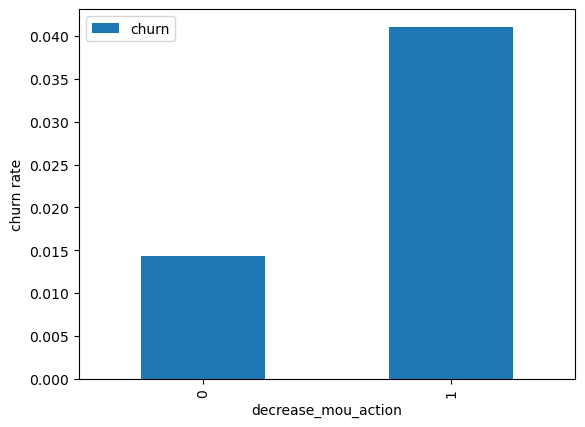

In [75]:
plt.figure(figsize=(2,2))
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase. 

##### Churn rate on the basis whether the customer decreased her/his number of recharge in action month

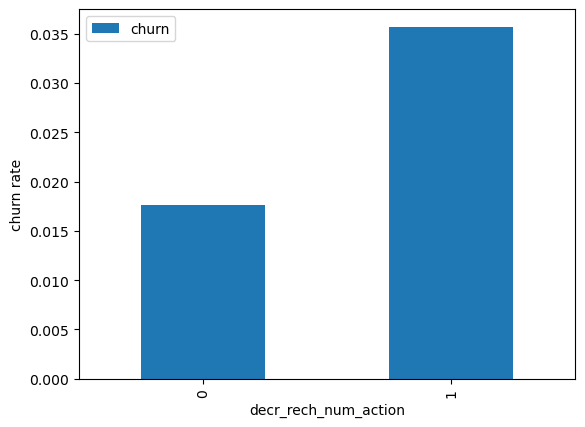

In [76]:
data.pivot_table(values='churn', index='decr_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Finding & AnalysiS

The churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

##### Churn rate on the basis of Amount of recharge in action month

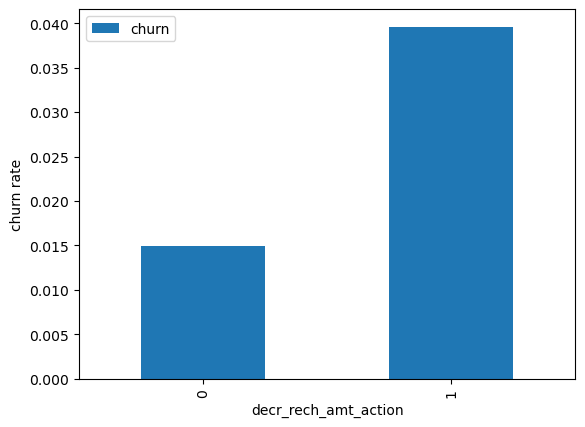

In [77]:
data.pivot_table(values='churn', index='decr_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Finding & Analysis***

We see the same behaviour here as above. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

##### Churn rate on the basis of Volume Based Cost whether the customer decreased in the action month

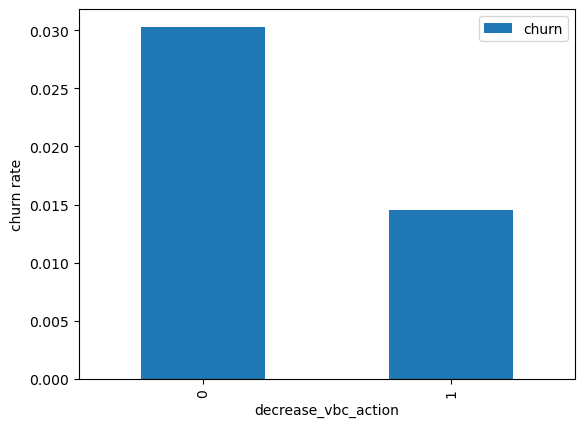

In [78]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Finding & Analysis***

We see the expected result, the churn rate is more in customers, whose volume based cost is increased in the action month. This indicates that the customers do not do more monthly recharge when they are in the action phase.

##### Average revenue per customer Analysis  (churn and not churn) in the action phase

In [79]:
# Creation of the churn dataframe
data_churn = data[data['churn'] == 1]
# Creation of not churn dataframe
data_non_churn = data[data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

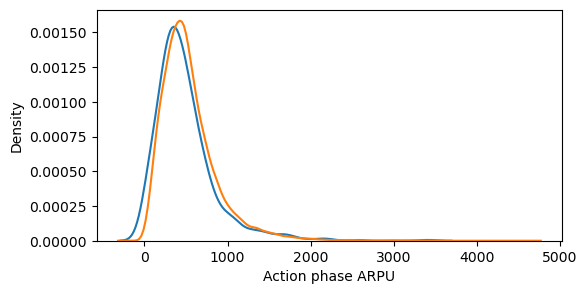

In [80]:
# Distribution plot
plt.figure(figsize=(6,3))
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

Average revenue per user (ARPU) for the churned customers is mostly high on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly high on the 0 to 1000. 

##### Analysis on minutes of usage MOU (churn and not churn) in the action phase

[Text(0.5, 0, 'Action phase MOU')]

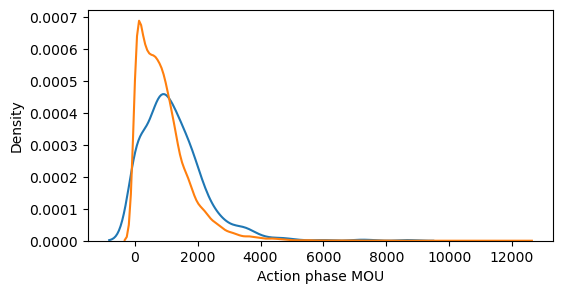

In [81]:
# Distribution plot
plt.figure(figsize=(6,3))
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

### Bivariate analysis

##### Analysis on churn rate by the decreasing recharge amount and number of recharge in the action phase

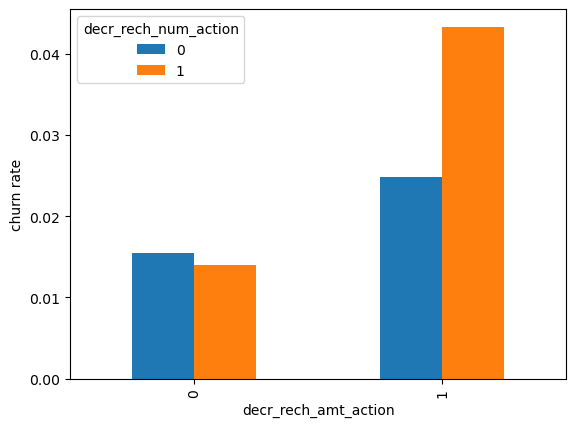

In [82]:
data.pivot_table(values='churn', index='decr_rech_amt_action', columns='decr_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

*** Findings & Analysis***

It is evident from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

##### Analysis on churn rate by the decreasing recharge amount & volume based cost in the action phase

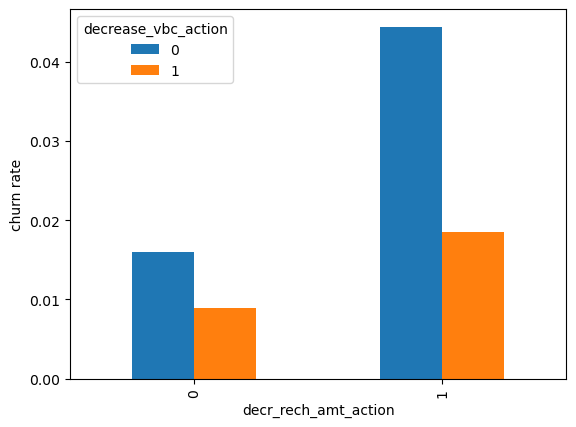

In [83]:
data.pivot_table(values='churn', index='decr_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Findings & Analysis***

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

##### Analysis on recharge amount & number of recharge in action month

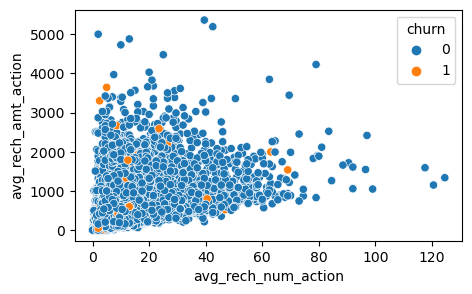

In [84]:
plt.figure(figsize=(5,3))
ax = sns.scatterplot('avg_rech_num_action','avg_rech_amt_action', hue='churn', data=data)

***Findings & Analysis***

It is shown From the above pattern that the recharge number & the recharge amount are mostly propotional. More the number of recharge, more is the amount of the recharge.

#### Dropping few derived columns, which are not required in further analysis

In [85]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_recharge_amt'], axis=1)

## Train-Test Split

In [86]:
# Import library
from sklearn.model_selection import train_test_split

In [87]:
# Assigining feature variables to X
X = data.drop(['mobile_number','churn'], axis=1)

In [88]:
# Assigining target variable to y
y = data['churn']

In [89]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with data imbalance

Creation of synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [90]:
# Imporing SMOTE
!pip install imblearn
from imblearn.over_sampling import SMOTE

In [91]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [92]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling

In [93]:
# Standardization methods
from sklearn.preprocessing import StandardScaler

In [94]:
# Instantiating the Scaler
scaler = StandardScaler()

In [95]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decr_rech_num_action')
cols_scale.remove('decr_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [96]:
# Fitting the data into scaler and transforming 
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [97]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,...,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decr_rech_num_action,decr_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,-0.055307,-0.151092,-0.055671,-0.356635,0.089753,-0.062077,0.225182,-0.357279,-0.336039,-0.263263,-0.150771,-0.295398,-0.297873,-0.140444,-0.267946,-0.147306,-0.033259,-0.244063,0.576749,-0.132380,-0.219032,-0.231808,-0.242531,-0.144250,-0.279089,-0.261279,0.122755,0.268957,-0.116610,-0.295258,-0.280980,0.128445,0.082745,0.045847,-0.286945,-0.181817,-0.148803,-0.122282,-0.11285,0.0,0.0,0.0,-0.167319,-0.115723,-0.064495,-0.085137,-0.077187,...,-0.293563,-0.330317,2.731454,-0.095853,-0.193095,-0.127936,-0.140655,-0.124396,-0.044444,-0.093822,-0.072291,1.280520,1.740907,1.721165,-0.051240,-0.228853,0.007958,-0.564624,-0.651514,-0.536388,-0.498156,-0.300829,-0.307402,-0.335583,-0.320926,1.256308,-0.344809,-0.352028,-0.316136,-0.291115,-0.294353,-0.273879,0.158963,0.113951,2.476524,-0.267012,-0.268187,-0.245303,-0.190726,-0.191165,1.429233,-0.647632,-0.310153,-0.327657,-0.324244,1,0,1,1,0
1,0.0,0.0,0.0,-0.248482,1.888717,1.379675,1.216670,2.893375,2.613683,-0.780605,-0.721369,-0.580714,-0.263263,-0.265207,-0.304001,-0.297873,-0.350295,-0.333748,-0.032625,0.412465,0.266306,-0.544460,-0.567639,-0.473322,-0.061405,-0.128709,0.530753,-0.296910,0.093071,-0.236227,-0.373019,-0.087028,-0.109835,1.324474,2.973274,2.936927,-0.556656,-0.480362,-0.360243,-0.148803,-0.122282,-0.11285,0.0,0.0,0.0,0.540034,1.717671,1.755539,-0.085137,-0.077187,...,-0.352264,0.044754,-0.374317,-0.095853,-0.193095,-0.090992,-0.006665,-0.029212,0.949879,-0.093822,-0.072291,-0.546531,-0.709088,0.321237,0.905504,0.805372,1.419033,2.032424,1.880400,-0.006466,2.833785,0.332511,0.432150,-0.335583,-0.320926,-0.151190,-0.344809,-0.352028,-0.316136,-0.291115,-0.294353,-0.273879,-0.382614,-0.397741,0.230239,-0.267012,-0.268187,-0.245303,-0.190726,-0.191165,-0.140222,2.498589,-0.310153,-0.327657,-0.324244,0,0,1,0,0
2,0.0,0.0,0.0,0.312296,-0.155882,2.057771,0.654463,0.712899,2.104707,-0.498403,-0.516787,-0.506525,-0.263263,-0.265207,0.305071,-0.297873,-0.350295,1.078840,3.753559,3.409190,4.668862,0.236520,0.147285,-0.241061,-0.160807,-0.140628,0.364748,-0.296910,-0.261279,-0.236227,2.426551,2.311824,2.714457,-0.588889,-0.552371,-0.396609,-0.554671,-0.520225,-0.392962,-0.148803,-0.122282,-0.11285,0.0,0.0,0.0,-0.806808,-0.752293,-0.527857,-0.085137,-0.077187,...,1.260779,1.962464,-0.374317,-0.095853,-0.193095,-0.127936,-0.140655,0.038470,-0.086237,-0.051914,-0.072291,-0.546531,-0.825754,0.575769,0.299639,-0.005424,2.455257,-0.279743,0.586586,0.126014,0.123185,1.282522,0.432150,-0.335583,-0.320926,-0.271703,-0.344809,-0.352028,-0.316136,-0.2

##### Scaling the test set
We don't fit scaler on to the test data set, We use only transform the test set.

In [98]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,...,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decr_rech_num_action,decr_rech_amt_action,decrease_arpu_action,decrease_vbc_action
68986,0.0,0.0,0.0,-0.041026,-0.272320,0.102921,0.504749,0.413174,0.350764,-0.221078,-0.160609,-0.011648,-0.083589,-0.265207,-0.304001,-0.027698,-0.350295,-0.333748,-0.025788,0.017738,0.060887,0.534802,0.849100,0.856075,0.574517,0.400473,0.099914,-0.296910,-0.261279,-0.236227,0.358362,0.556566,0.585073,0.512464,0.480754,0.441754,-0.406124,-0.419815,-0.354136,-0.148803,0.049873,-0.11285,0.0,0.0,0.0,0.073783,0.036635,0.066430,-0.085137,-0.042684,...,0.182769,0.366513,1.351111,-0.095853,-0.193095,-0.127936,-0.137422,-0.124396,0.321244,0.000889,-0.072291,-0.774912,-1.059087,-0.569627,-0.053419,0.017610,0.048890,0.773651,0.456585,0.457215,1.047430,1.116270,0.580061,-0.335583,-0.320926,-0.271703,-0.344809,-0.352028,-0.316136,-0.291115,-0.294353,-0.273879,-0.382614,-0.397741,-0.331333,-0.267012,-0.268187,-0.245303,-0.190726,-0.191165,-0.140222,-1.052952,-0.310153,-0.327657,-0.324244,1,1,1,1,0
85420,0.0,0.0,0.0,-0.766663,-0.691878,-0.338262,-0.693101,-0.676317,-0.516380,-0.708901,-0.632320,-0.421652,-0.263263,-0.265207,-0.304001,-0.297873,-0.350295,-0.333748,-0.272991,-0.310393,-0.265627,-0.332802,-0.189375,0.006472,-0.137346,-0.119770,-0.075135,-0.296910,-0.261279,-0.236227,-0.387150,-0.326129,-0.161849,-0.588889,-0.552371,-0.396609,-0.556263,-0.520225,-0.392962,-0.148803,-0.122282,-0.11285,0.0,0.0,0.0,-0.807928,-0.752293,-0.527857,-0.085137,-0.077187,...,-0.453777,-0.445682,-0.374317,-0.095853,-0.193095,-0.127936,-0.140655,-0.124396,-0.086237,0.219647,0.312706,-0.774912,-0.825754,-0.696893,-0.480576,-0.984368,0.053198,0.661024,0.598967,0.801664,-0.731159,-0.696667,-0.529267,1.714645,0.939025,-0.271703,-0.344809,0.062600,0.912441,-0.291115,-0.294353,-0.273879,-0.382614,-0.397741,-0.331333,2.388713,2.235802,2.240950,-0.190726,-0.191165,-0.140222,3.654632,-0.310153,-0.291739,-0.324244,0,1,1,1,0
38082,0.0,0.0,0.0,-0.559913,1.238306,0.644741,-0.175084,2.065589,2.043109,-0.186341,0.255974,-0.232480,-0.263263,-0.265207,-0.304001,-0.297873,-0.350295,-0.333748,-0.351830,-0.192400,-0.037371,-0.622593,-0.583665,-0.330719,-0.053997,-0.169232,-0.042838,-0.241469,-0.131351,-0.236227,-0.617061,-0.494562,-0.234642,-0.019478,2.330187,2.427487,0.105262,0.559577,0.001462,-0.148803,-0.122282,-0.11285,0.0,0.0,0.0,0.058764,2.008043,1.646385,-0.085137,-0.077187,...,-0.285779,-0.450388,-0.374317,-0.095853,-0.193095,-0.127936,-0.140655,-0.124396,-0.066212,-0.093822,-0.072291,0.252804,2.557572,1.212100,-0.580828,1.104814,0.703801,-0.770002,-0.280084,-0.006466,-0.498156,0.174176,-0.307402,-0.335583,-0.320926,-0.271703,-0.344809,-0.35202

# Model with PCA

In [99]:
#Import PCA
from sklearn.decomposition import PCA

In [100]:
# Instantiate PCA
pca = PCA(random_state=42)

In [101]:
# Fiting train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [102]:
# Principal components
pca.components_

array([[-8.96698395e-20, -2.77555756e-17,  4.44089210e-16, ...,
        -2.18974649e-02, -2.23884815e-02,  4.32197241e-03],
       [ 1.36695290e-19, -5.55111512e-17, -1.11022302e-16, ...,
         1.18585118e-02,  9.87679575e-03, -2.55089646e-02],
       [-3.89959422e-19,  2.77555756e-17,  5.55111512e-17, ...,
        -2.81754181e-02, -3.05886760e-02,  1.11465055e-02],
       ...,
       [-0.00000000e+00, -2.17343086e-01,  5.99547656e-02, ...,
        -2.64599540e-16,  1.95838676e-16, -6.07295095e-17],
       [ 9.99995484e-01, -2.28420432e-03,  1.54255466e-03, ...,
        -2.74946895e-18, -1.97697490e-18,  9.27924594e-19],
       [-0.00000000e+00,  1.44714602e-01,  4.79485450e-02, ...,
         3.41090003e-16, -3.36211094e-16,  3.59792491e-16]])

In [103]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11029825 0.20006975 0.25312882 0.29684397 0.33784459 0.37453297
 0.40824512 0.43514142 0.46100543 0.48447314 0.50715725 0.52894716
 0.55015345 0.56949094 0.5882614  0.60630063 0.62270825 0.63833049
 0.65287027 0.66682686 0.68043887 0.69398571 0.70595993 0.71678567
 0.72738236 0.73727709 0.7468513  0.75605686 0.76519684 0.77393585
 0.7820598  0.78980769 0.79735337 0.80456328 0.81167514 0.81852341
 0.82525554 0.83187024 0.83799265 0.84392106 0.84965105 0.85534493
 0.86088485 0.86624778 0.87149993 0.87660882 0.88141683 0.88602685
 0.89033583 0.89456226 0.89850411 0.90236792 0.90619256 0.90983746
 0.91329484 0.91671573 0.92007909 0.9234138  0.9266146  0.92967126
 0.93269531 0.9356407  0.93843272 0.94112597 0.94374255 0.94629409
 0.94880439 0.95129689 0.95364703 0.95596845 0.95823014 0.96031155
 0.96234511 0.96432034 0.96628025 0.96819338 0.97003195 0.97186716
 0.97367166 0.97540376 0.9770617  0.97869455 0.98028201 0.98184382
 0.98338055 0.98472894 0.98604025 0.987326   0.98850852 0.9896

Text(0, 0.5, 'Cumulative Variance')

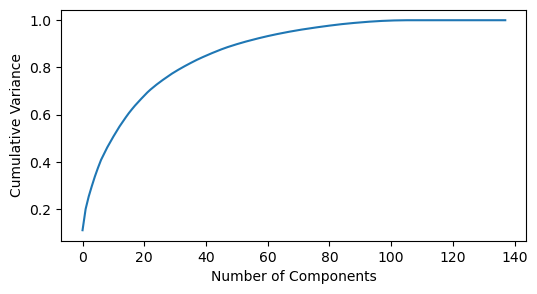

In [104]:
# Plotting scree plot
fig = plt.figure(figsize = (6,3))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that `60 components` explain almost more than 90% variance of the data. So, we will perform PCA with 60 components.

##### Performing PCA with 60 components

In [105]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [106]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [107]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

##### Applying transformation on the test data set
We are only doing Transform in the test set not the Fit-Transform as the Fitting is already done on the train set. Hence, we just have to do the transformation with the already fitted data on the train set.

In [108]:
X_test_pca = pca_final.transform(X_test)

#### Emphasize Sensitivity/Recall than Accuracy

We are more focused on higher Sensitivity/Recall score than the accuracy.

As the main goal is to retain the customers we need to be more careful about the potential churn cases. There shouldn't be any issue if we consider few not churn customers as churn customers and incentivise to retain them. Hence, the sensitivity score is more important here.

## Logistic regression with PCA

In [109]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [110]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Tuning hyperparameter  C
Higher values of C correspond to less regularization, In Logistic Regression C is the the inverse of regularization strength.

In [111]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

In [112]:
#Creation of KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

#Specifing score as recall as we focus more on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [113]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.352173,0.034251,0.004326,0.006111,0.01,{'C': 0.01},0.915700,0.916706,0.921335,0.911778,0.912062,0.915516,0.003499,6,0.917944,0.916453,0.913934,0.915148,0.916830,0.916062,0.001389
1,0.732339,0.112622,0.003126,0.006252,0.1,{'C': 0.1},0.916425,0.918122,0.922288,0.912477,0.912062,0.916275,0.003789,5,0.918714,0.917049,0.914350,0.915447,0.917956,0.916703,0.001603
2,0.692173,0.040380,0.003126,0.006252,1,{'C': 1},0.916184,0.919066,0.922050,0.912244,0.912782,0.916465,0.003726,4,0.918596,0.917227,0.914588,0.915506,0.918549,0.916893,0.001612
3,1.285489,0.783693,0.012501,0.018223,10,{'C': 10},0.916184,0.919066,0.922050,0.912244,0.913023,0.916513,0.003679,1,0.918596,0.917108,0.914588,0.915447,0.918371,0.916822,0.001582
4,0.825765,0.119930,0.012504,0.006252,100,{'C': 100},0.916184,0.918830,0.922050,0.912244,0.913023,0.916466,0.003648,3,0.918655,0.917108,0.914588,0.915387,0.918371,0.916822,0.001606
5,0.651519,0.084647,0.009377,0.007657,1000,{'C': 1000},0.916184,0.919066,0.922050,0.912244,0.913023,0.916513,0.003679,1,0.918773,0.917049,0.914588,0.915327,0.918371,0.916822,0.001642


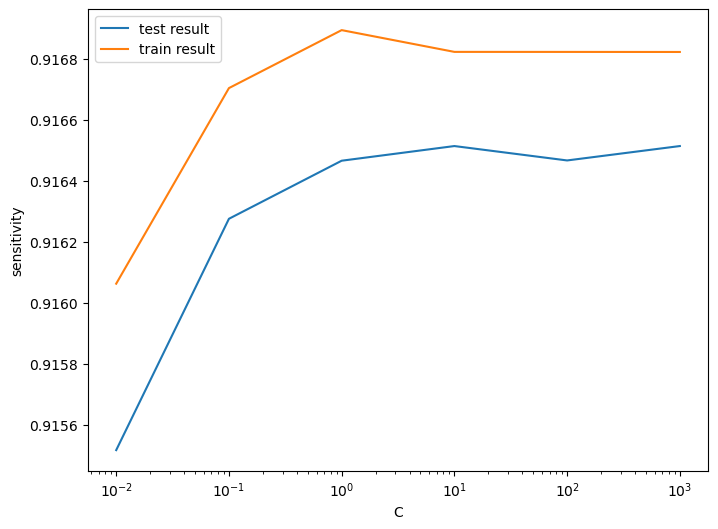

In [114]:
# plot of C versus train & validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [115]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9165131529215387 at C = 10


#### Logistic regression with optimal C

In [116]:
# Instanting the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [117]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

##### Prediction on the train set

In [118]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [119]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17913  3118]
 [ 1760 19271]]


In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8840283391184443
Sensitivity:- 0.9163140126479958
Specificity:- 0.8517426655888926


##### Prediction on the test set

In [122]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [123]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4426  822]
 [  29  129]]


In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.842582315945246
Sensitivity:- 0.8164556962025317
Specificity:- 0.8433689024390244


***Model summary***

- Train set
    - Accuracy = 0.86
    - Sensitivity = 0.89
    - Specificity = 0.83
- Test set
    - Accuracy = 0.83
    - Sensitivity = 0.81
    - Specificity = 0.83
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

## Support Vector Machine(SVM) with PCA

In [126]:
# Importing SVC
from sklearn.svm import SVC

#### Hyperparameter tuning, 
C:- Regularization parameter, gamma:- Handles non linear classifications.

In [127]:
# Range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# Model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train)                  


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [128]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,35.267111,9.221009,21.964270,9.293099,1,0.01,"{'C': 1, 'gamma': 0.01}",0.945296,0.950075,0.949643,0.948338,0.002158,5,0.954032,0.953104,0.952001,0.953046,0.000830
1,32.039087,0.520471,22.949100,0.592414,1,0.001,"{'C': 1, 'gamma': 0.001}",0.894872,0.895799,0.898003,0.896225,0.001313,10,0.899326,0.896865,0.896191,0.897461,0.001347
2,55.277521,13.362507,45.035831,11.616398,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.875758,0.875401,0.877389,0.876183,0.000866,12,0.877715,0.876360,0.875544,0.876539,0.000895
3,25.021915,1.909918,16.417633,1.617636,10,0.01,"{'C': 10, 'gamma': 0.01}",0.967905,0.969617,0.969187,0.968903,0.000727,3,0.978103,0.977426,0.976785,0.977438,0.000538
4,30.786470,1.449152,20.310863,5.065507,10,0.001,"{'C': 10, 'gamma': 0.001}",0.915270,0.916268,0.920043,0.917194,0.002055,7,0.922649,0.920616,0.918408,0.920558,0.001732
5,34.559493,0.522229,24.857304,2.166095,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.885743,0.886599,0.889230,0.887190,0.001484,11,0.889876,0.888021,0.885600,0.887832,0.001751
6,33.269660,0.867243,9.273865,1.523097,100,0.01,"{'C': 100, 'gamma': 0.01}",0.977106,0.979602,0.978673,0.978460,0.001030,2,0.992404,0.992796,0.991834,0.992345,0.000395
7,37.611862,5.953947,19.238902,9.809632,100,0.001,"{'C': 100, 'gamma': 0.001}",0.939805,0.945653,0.945863,0.943774,0.002808,6,0.951286,0.949538,0.948827,0.949884,0.001033
8,35.852999,4.438887,18.249927,0.500905,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.894444,0.896869,0.900499,0.897271,0.002488,9,0.900859,0.898827,0.896477,0.898721,0.001791
9,42.780610,4.769542,5.809582,1.219994,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.978889,0.981670,0.979529,0.980029,0.001189,1,0.999001,0.999073,0.998823,0.998966,0.000105


##### Plotting the accuracy with various C and gamma values

KeyError: 'mean_testscore'

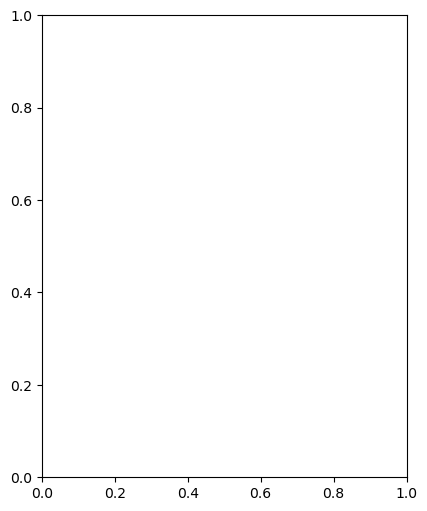

In [129]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_testscore"])
plt.plot(gamma_01["param_C"], gamma_01["mean_trainscore"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_testscore"])
plt.plot(gamma_001["param_C"], gamma_001["mean_trainscore"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_testscore"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_trainscore"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')



In [130]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9800294683984485 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


From the above plot, It shows that higher value of gamma leads to overfitting the model, we have trained & tested with the lowest value of gamma (0.0001) and the test accuracy almost same.

Also, at C=100 we have a good accuracy and the train & test scores are comparable.

We can achieve comparable average test accuracy (90%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:
- High gamma (i.e. high non-linearity) & average value of C
- Low gamma (i.e. less non-linearity) & high value of C

The model will be simpler if it has as less non-linearity as possible, hence we choose gamma=0.0001 and a high C=100.

##### Build the model with hyperparameters

In [131]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

##### Prediction on the train set

In [132]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

In [133]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17911  3120]
 [ 1032 19999]]


In [134]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9012885740097951
Sensitivity:- 0.9509295801435975
Specificity:- 0.8516475678759926


##### Prediction on the test set

In [136]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

In [137]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4451  797]
 [  33  125]]


In [138]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8464668886422494
Sensitivity:- 0.7911392405063291
Specificity:- 0.8481326219512195


***Model summary***

- Train set
    - Accuracy = 0.89
    - Sensitivity = 0.92
    - Specificity = 0.85
- Test set
    - Accuracy = 0.85
    - Sensitivity = 0.81
    - Specificity = 0.85

## Decision tree with PCA

In [140]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

##### Hyperparameter tuning

In [141]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [142]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.413435,0.150684,0.000000,0.000000,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.893961,0.912527,0.911793,0.913219,0.904898,0.907279,0.007297,3
1,1.362379,0.076360,0.004325,0.006110,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.893961,0.912527,0.911793,0.913219,0.904898,0.907279,0.007297,3
2,1.407590,0.150570,0.009382,0.007660,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.887542,0.902068,0.905849,0.900143,0.903709,0.899862,0.006440,7
3,1.271785,0.015752,0.012508,0.006254,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.887542,0.902068,0.905849,0.900143,0.903709,0.899862,0.006440,7
4,2.250496,0.212576,0.006255,0.007661,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.905373,0.928690,0.931289,0.935330,0.939848,0.928106,0.011978,2
5,2.259482,0.128652,0.009380,0.007659,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.905849,0.928690,0.931289,0.935330,0.939848,0.928201,0.011797,1
6,2.077904,0.063130,0.009384,0.007662,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.889444,0.904920,0.895863,0.917499,0.916310,0.904807,0.011040,5
7,2.188287,0.125861,0.006253,0.007658,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.889444,0.904920,0.895863,0.917499,0.916310,0.904807,0.011040,5


In [143]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.9282012035055583
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


##### Model with optimal hyperparameters

In [144]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [145]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [146]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18126  2905]
 [ 1157 19874]]


In [147]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [148]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9034282725500452
Sensitivity:- 0.9449859730873472
Specificity:- 0.8618705720127431


##### Prediction on the test set

In [149]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [150]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4478  770]
 [  37  121]]


In [151]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [152]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8507214206437292
Sensitivity:- 0.7658227848101266
Specificity:- 0.8532774390243902


***Model summary***

- Train set
    - Accuracy = 0.90
    - Sensitivity = 0.91
    - Specificity = 0.88
- Test set
    - Accuracy = 0.86
    - Sensitivity = 0.70
    - Specificity = 0.87
    
    
As per the model performance that the Sensitivity has been decreased while evaluating the model on the test set. However, the accuracy & specificity is quite good in the test set.

## Random forest with PCA

In [153]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

##### Hyperparameter tuning

In [154]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [155]:
# printing optimal accuracy score & hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8769674253649077 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 300}


##### Model with optimal hyperparameters

In [156]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [157]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

##### Prediction on the train set

In [158]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [159]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17981  3050]
 [ 1960 19071]]


In [160]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [161]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.880890114592744
Sensitivity:- 0.9068042413579953
Specificity:- 0.8549759878274927


##### Prediction on the test set

In [162]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [163]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4439  809]
 [  34  124]]


In [164]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [165]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.844062153163152
Sensitivity:- 0.7848101265822784
Specificity:- 0.8458460365853658


***Model summary***

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.88
    - Specificity = 0.80
- Test set
    - Accuracy = 0.80
    - Sensitivity = 0.75
    - Specificity = 0.80
    
    
From the model performance we can see that the Sensitivity has decreased while evaluating the model on the test set. However, the accuracy & specificity is quite good in the test set.

### Conclusion with PCA
After trying diffrent models we can see that for acheiving the best sensitivity, which is the goal, the classic Logistic regression or the SVM models performs well. For both the models the sensitivity was approx 81%. Also we have good accuracy of apporx 85%.

# Without PCA

## Logistic regression with No PCA

In [166]:
##### Importing stats model
import statsmodels.api as sm

In [167]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [168]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [169]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42062
Model:                            GLM   Df Residuals:                    41932
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 20 Mar 2023   Deviance:                   5.4590e+05
Time:                        01:33:00   Pearson chi2:                 2.67e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.049e+14   8.22e+05   3.71e+08      0.000    3.05e+14    3.05e+14
loc_og_t2o_mou       -1.406e+07      0.968  -1.45e+07      0.000   -1.41e+07   -1.41e+07
std_og_t2o_mou        4.168e+08      2.328   1.79e+08      0.000    4.17e+08    4.17e+08
loc_ic_t2o_mou       -2.313e+08      3.201  -7.23e+07      0.000   -2.31e+08   -2.31e+08
arpu_6                2.964e+13    1.1e+06   2.69e+07      0.000    2.96e+13    2.96e+13
arpu_7                5.025e+12   1.41e+06   3.58e+06      0.000    5.02e+12    5.02e+12
arpu_8                9.354e+13   1.64e+06   5.69e+07      0.000    9.35e+13    9.35e+13
onnet_mou_6           3.138e+13   5.48e+07   5.72e+05      0.000    3.14e+13    3.14e+13
onnet_mou_7           1.464e+15   3.69e+07   3.96e+07      0.000    1.46e+15    1.46e+15
onnet_mou_8           1.507e+15   2.59e+07   5.81e+07      0.000    1.51e+15    1.51e+15
offnet_mou_6           1.86e+14   5.58e+07   3.33e+06      0.000    1.86e+14    1.86e+14
offnet_mou_7          1.725e+15   3.73e+07   4.62e+07      0.000    1.73e+15    1.73e+15
offnet_mou_8          1.358e+15   2.55e+07   5.32e+07      0.000    1.36e+15    1.36e+15
roam_ic_mou_6         5.285e+13   6.24e+05   8.47e+07      0.000    5.29e+13    5.29e+13
roam_ic_mou_7         1.842e+13   6.83e+05    2.7e+07      0.000    1.84e+13    1.84e+13
roam_ic_mou_8         2.539e+13   5.38e+05   4.72e+07      0.000    2.54e+13    2.54e+13
roam_og_mou_6        -1.442e+14   1.77e+07  -8.16e+06      0.000   -1.44e+14   -1.44e+14
roam_og_mou_7        -5.848e+14   1.13e+07  -5.16e+07      0.000   -5.85e+14   -5.85e+14
roam_og_mou_8        -4.358e+14   1.06e+07   -4.1e+07      0.000   -4.36e+14   -4.36e+14
loc_og_t2t_mou_6      1.275e+18   1.23e+10   1.04e+08      0.000    1.28e+18    1.28e+18
loc_og_t2t_mou_7      1.006e+18    1.3e+10   7.71e+07      0.000    1.01e+18    1.01e+18
loc_og_t2t_mou_8     -1.849e+18   1.27e+10  -1.46e+08      0.000   -1.85e+18   -1.85e+18
loc_og_t2m_mou_6      1.348e+18    1.3e+10   1.04e+08      0.000    1.35e+18    1.35e+18
loc_og_t2m_mou_7      9.473e+17   1.23e+10   7.71e+07      0.000    9.47e+17    9.47e+17
loc_og_t2m_mou_8     -1.921e+18   1.32e+10  -1.46e+08      0.000   -1.92e+18   -1.92e+18
loc_og_t2f_mou_6      1.104e+17   1.06e+09   1.04e+08      0.000     1.1e+17     1.1e+17
loc_og_t2f_mou_7      8.446e+16   1.09e+09   7.72e+07      0.000    8.45e+16    8.45e+16
loc_og_t2f_mou_8     -1.585e+17   1.08e+09  -1.46e+08      0.000   -1.58e+17   -1.58e+17
loc_og_t2c_mou_6      -6.48e+13   4.08e+05  -1.59e+08      0.000   -6.48e+13   -6.48e+13
loc_og_t2c_mou_7     -6.019e+13   4.65e+05  -1.29e+08      0.000   -6.02e+13   -6.02e+13
loc_og_t2c_mou_8      1.026e+14   4.56e+05   2.25e+08      0.000    1.03e+14    1.03e+14
loc_og_mou_6         -2.952e+18   2.51e+10  -1.17e+08    

***Model analysis***
1. As seen there are few features have positive coefficients & few have negative.
2. Many features have higher p-values & hence became insignificant in the model.

***Coarse tuning (Auto+Manual)***

We first eliminate few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can manually eliminating features based on observing the p-values and VIFs

### Feature Selection Using RFE

In [170]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

#### RFE with 15 columns

In [171]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, step=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [172]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_6', 'arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_7', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'isd_ic_mou_7', 'ic_others_8', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_8', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'vol

### Model-1 with RFE selected columns

In [173]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42062
Model:                            GLM   Df Residuals:                    41992
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 20 Mar 2023   Deviance:                       21934.
Time:                        01:33:12   Pearson chi2:                 5.06e+06
No. Iterations:                    40   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -23.5415   3849.315     -0.006      0.995   -7568.060    7520.977
arpu_6                   0.5524      0.071      7.832      0.000       0.414       0.691
arpu_8                  -0.2678      0.093     -2.893      0.004      -0.449      -0.086
onnet_mou_7             -1.5442      0.228     -6.769      0.000      -1.991      -1.097
onnet_mou_8              6.2823      2.174      2.890      0.004       2.022      10.543
offnet_mou_7             0.7348      0.204      3.610      0.000       0.336       1.134
offnet_mou_8             3.9795      2.156      1.846      0.065      -0.245       8.204
roam_ic_mou_7            0.3714      0.054      6.914      0.000       0.266       0.477
roam_ic_mou_8            0.2538      0.049      5.184      0.000       0.158       0.350
roam_og_mou_6           -0.1187      0.031     -3.779      0.000      -0.180      -0.057
roam_og_mou_8           -1.5934      0.893     -1.785      0.074      -3.343       0.156
loc_og_t2t_mou_7         0.8034      0.094      8.568      0.000       0.620       0.987
loc_og_t2t_mou_8      7590.8910    648.666     11.702      0.000    6319.529    8862.253
loc_og_t2m_mou_7        -0.6622      0.085     -7.819      0.000      -0.828      -0.496
loc_og_t2m_mou_8      7889.3186    674.081     11.704      0.000    6568.144    9210.493
loc_og_t2f_mou_6         0.2537      0.036      7.137      0.000       0.184       0.323
loc_og_t2f_mou_8       649.4814     55.534     11.695      0.000     540.637     758.326
loc_og_t2c_mou_8         0.1258      0.025      4.944      0.000       0.076       0.176
loc_og_mou_8         -3460.9765   1473.768     -2.348      0.019   -6349.509    -572.444
std_og_t2t_mou_6         0.3215      0.038      8.416      0.000       0.247       0.396
std_og_t2t_mou_7         1.4625      0.213      6.867      0.000       1.045       1.880
std_og_t2t_mou_8         0.7125      1.075      0.663      0.508      -1.395       2.820
std_og_t2m_mou_7        -0.3511      0.191     -1.841      0.066      -0.725       0.023
std_og_t2m_mou_8         2.5316      1.020      2.482      0.013       0.532       4.531
std_og_mou_8          1.699e+04   1864.853      9.112      0.000    1.33e+04    2.06e+04
isd_og_mou_8           359.3746     39.463      9.107      0.000     282.029     436.720
spl_og_mou_8           472.4334     51.875      9.107      0.000     370.760     574.107
og_others_7             -0.5869      0.539     -1.088      0.277      -1.644       0.470
og_others_8          -1831.4563    3.1e+05     -0.006      0.995    -6.1e+05    6.07e+05
total_og_mou_8       -1.962e+04   2151.353     -9.118      0.000   -2.38e+04   -1.54e+04
loc_ic_t2m_mou_7         0.1961      0.053      3.725      0.000       0.093       0.299
loc_ic_t2m_mou_8        -0.6163      0.129     -4.771    

#### Checking VIFs

In [174]:
# Check for VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [175]:
# Creating a dataframe that will contain the names of feature variables & their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,total_og_mou_8,1.472920e+10
23,std_og_mou_8,1.106663e+10
17,loc_og_mou_8,6.885896e+09
13,loc_og_t2m_mou_8,1.351229e+09
11,loc_og_t2t_mou_8,1.251266e+09
...,...,...
50,vol_2g_mb_6,1.290000e+00
41,ic_others_8,1.200000e+00
39,spl_ic_mou_8,1.050000e+00
26,og_others_7,1.030000e+00


##### Eliminating column og_others_8, which is insignificatnt as it has the highest p-value 0.99

In [176]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['arpu_6', 'arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_7', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_7', 'ic_others_8', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_8', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_7', 'sachet_2g_8', 

### Model-2
Building the model after removing og_others_8 variable.

In [177]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42062
Model:                            GLM   Df Residuals:                    41993
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 20 Mar 2023   Deviance:                       21936.
Time:                        01:33:50   Pearson chi2:                 5.09e+06
No. Iterations:                    12   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.8412      0.100     -8.398      0.000      -1.038      -0.645
arpu_6                   0.5523      0.071      7.830      0.000       0.414       0.691
arpu_8                  -0.2670      0.093     -2.884      0.004      -0.448      -0.086
onnet_mou_7             -1.5458      0.228     -6.775      0.000      -1.993      -1.099
onnet_mou_8              6.2695      2.173      2.885      0.004       2.011      10.528
offnet_mou_7             0.7347      0.204      3.609      0.000       0.336       1.134
offnet_mou_8             3.9663      2.155      1.841      0.066      -0.257       8.190
roam_ic_mou_7            0.3713      0.054      6.913      0.000       0.266       0.477
roam_ic_mou_8            0.2537      0.049      5.181      0.000       0.158       0.350
roam_og_mou_6           -0.1185      0.031     -3.773      0.000      -0.180      -0.057
roam_og_mou_8           -1.5880      0.892     -1.780      0.075      -3.337       0.161
loc_og_t2t_mou_7         0.8040      0.094      8.573      0.000       0.620       0.988
loc_og_t2t_mou_8      7599.2418    648.524     11.718      0.000    6328.158    8870.326
loc_og_t2m_mou_7        -0.6621      0.085     -7.817      0.000      -0.828      -0.496
loc_og_t2m_mou_8      7897.9970    673.934     11.719      0.000    6577.111    9218.883
loc_og_t2f_mou_6         0.2541      0.036      7.144      0.000       0.184       0.324
loc_og_t2f_mou_8       650.1961     55.522     11.711      0.000     541.376     759.017
loc_og_t2c_mou_8         0.1256      0.025      4.941      0.000       0.076       0.175
loc_og_mou_8         -3355.8532   1466.678     -2.288      0.022   -6230.489    -481.217
std_og_t2t_mou_6         0.3216      0.038      8.419      0.000       0.247       0.396
std_og_t2t_mou_7         1.4642      0.213      6.875      0.000       1.047       1.882
std_og_t2t_mou_8         0.7053      1.075      0.656      0.512      -1.403       2.813
std_og_t2m_mou_7        -0.3506      0.191     -1.838      0.066      -0.724       0.023
std_og_t2m_mou_8         2.5249      1.020      2.475      0.013       0.525       4.524
std_og_mou_8          1.722e+04   1842.908      9.343      0.000    1.36e+04    2.08e+04
isd_og_mou_8           364.1313     38.999      9.337      0.000     287.696     440.567
spl_og_mou_8           478.6862     51.265      9.338      0.000     378.209     579.163
og_others_7             -0.5876      0.540     -1.089      0.276      -1.646       0.470
total_og_mou_8       -1.988e+04   2126.040     -9.348      0.000    -2.4e+04   -1.57e+04
loc_ic_t2m_mou_7         0.1960      0.053      3.722      0.000       0.093       0.299
loc_ic_t2m_mou_8        -0.6161      0.129     -4.771      0.000      -0.869      -0.363
loc_ic_t2f_mou_8        -0.8869      0.077    -11.577    

#### Checking VIF for Model-2

In [178]:
# Creating a dataframe that will contain the names of all the feature variables & their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,loc_og_mou_8,3.347356e+09
13,loc_og_t2m_mou_8,1.345175e+09
11,loc_og_t2t_mou_8,1.245659e+09
15,loc_og_t2f_mou_8,9.128702e+06
27,total_og_mou_8,9.371787e+04
...,...,...
49,vol_2g_mb_6,1.290000e+00
40,ic_others_8,1.200000e+00
38,spl_ic_mou_8,1.050000e+00
26,og_others_7,1.030000e+00


We see from the model summary that all the variables p-values are significant and offnet_mou_8 column has the highest VIF 7.45. so, deleting offnet_mou_8 column.

In [179]:
# Removing offnet_mou_8 column
log_cols.remove('offnet_mou_8')

### Model-3
Model after removing offnet_mou_8 column.

In [180]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42062
Model:                            GLM   Df Residuals:                    41994
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 20 Mar 2023   Deviance:                       21939.
Time:                        01:34:32   Pearson chi2:                 5.24e+06
No. Iterations:                    12   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.8426      0.100     -8.410      0.000      -1.039      -0.646
arpu_6                   0.5539      0.071      7.828      0.000       0.415       0.693
arpu_8                  -0.2773      0.092     -2.998      0.003      -0.459      -0.096
onnet_mou_7             -1.5567      0.228     -6.823      0.000      -2.004      -1.110
onnet_mou_8              2.3031      0.289      7.956      0.000       1.736       2.870
offnet_mou_7             0.7515      0.204      3.689      0.000       0.352       1.151
roam_ic_mou_7            0.3682      0.054      6.870      0.000       0.263       0.473
roam_ic_mou_8            0.2524      0.049      5.161      0.000       0.157       0.348
roam_og_mou_6           -0.1197      0.031     -3.817      0.000      -0.181      -0.058
roam_og_mou_8            0.0502      0.070      0.721      0.471      -0.086       0.187
loc_og_t2t_mou_7         0.8058      0.094      8.592      0.000       0.622       0.990
loc_og_t2t_mou_8      7593.8197    648.336     11.713      0.000    6323.104    8864.535
loc_og_t2m_mou_7        -0.6681      0.085     -7.884      0.000      -0.834      -0.502
loc_og_t2m_mou_8      7892.3777    673.739     11.714      0.000    6571.874    9212.881
loc_og_t2f_mou_6         0.2548      0.035      7.178      0.000       0.185       0.324
loc_og_t2f_mou_8       649.7319     55.506     11.706      0.000     540.943     758.521
loc_og_t2c_mou_8         0.1384      0.025      5.615      0.000       0.090       0.187
loc_og_mou_8         -3287.1325   1465.911     -2.242      0.025   -6160.266    -413.999
std_og_t2t_mou_6         0.3223      0.038      8.439      0.000       0.247       0.397
std_og_t2t_mou_7         1.4730      0.213      6.915      0.000       1.055       1.890
std_og_t2t_mou_8         0.6946      1.077      0.645      0.519      -1.417       2.806
std_og_t2m_mou_7        -0.3669      0.191     -1.923      0.055      -0.741       0.007
std_og_t2m_mou_8         2.5432      1.022      2.488      0.013       0.540       4.546
std_og_mou_8          1.733e+04   1842.507      9.406      0.000    1.37e+04    2.09e+04
isd_og_mou_8           366.4882     38.991      9.399      0.000     290.067     442.909
spl_og_mou_8           481.7910     51.255      9.400      0.000     381.334     582.248
og_others_7             -0.5875      0.540     -1.088      0.277      -1.646       0.471
total_og_mou_8           -2e+04   2125.693     -9.409      0.000   -2.42e+04   -1.58e+04
loc_ic_t2m_mou_7         0.1944      0.053      3.694      0.000       0.091       0.298
loc_ic_t2m_mou_8        -0.6136      0.129     -4.747      0.000      -0.867      -0.360
loc_ic_t2f_mou_8        -0.8854      0.077    -11.564      0.000      -1.035      -0.735
loc_ic_mou_8            -1.0010      0.349     -2.872    

#### VIF Model-3

In [181]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,loc_og_mou_8,3.345183e+09
12,loc_og_t2m_mou_8,1.344351e+09
10,loc_og_t2t_mou_8,1.244896e+09
14,loc_og_t2f_mou_8,9.123113e+06
26,total_og_mou_8,9.371737e+04
...,...,...
48,vol_2g_mb_6,1.290000e+00
39,ic_others_8,1.200000e+00
37,spl_ic_mou_8,1.050000e+00
25,og_others_7,1.030000e+00


Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity within the variables.

Hence, we can conclused that ***Model-3 log_no_pca_3 will be the final model***.

###  Model performance on the train set

In [182]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    0.037659
1    0.166716
2    0.093658
3    0.768894
4    0.466696
dtype: float64

##### Creation of a dataframe with the actual churn & the predicted probabilities

In [183]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for more readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.037659,0
1,0,0.166716,1
2,0,0.093658,2
3,1,0.768894,3
4,0,0.466696,4


##### Optimal Probablity Cutoff Point

In [184]:
# Creating of columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.037659,0,1,0,0,0,0,0,0,0,0,0
1,0,0.166716,1,1,1,0,0,0,0,0,0,0,0
2,0,0.093658,2,1,0,0,0,0,0,0,0,0,0
3,1,0.768894,3,1,1,1,1,1,1,1,1,0,0
4,0,0.466696,4,1,1,1,1,1,0,0,0,0,0


##### calculating the accuracy sensitivity and specificity for various probability cutoffs.

In [185]:
# Creation of a dataframe
cutoff_Tele_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_Tele_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_Tele_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500190     1.000000     0.000380
0.1          0.1  0.836123     0.991299     0.680947
0.2          0.2  0.867814     0.982740     0.752889
0.3          0.3  0.884076     0.968332     0.799819
0.4          0.4  0.892801     0.949028     0.836575
0.5          0.5  0.896557     0.923541     0.869573
0.6          0.6  0.893871     0.890447     0.897294
0.7          0.7  0.881152     0.839142     0.923161
0.8          0.8  0.847701     0.746469     0.948933
0.9          0.9  0.770363     0.566497     0.974229


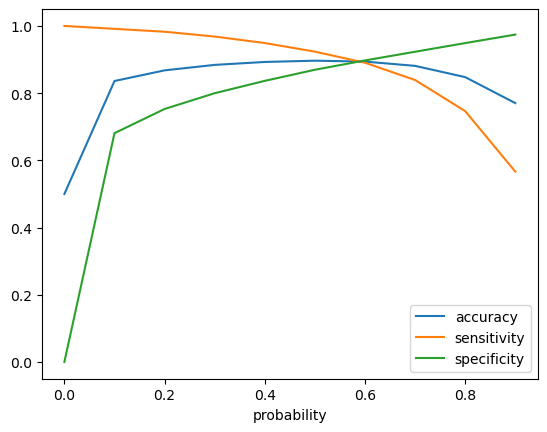

In [186]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_Tele_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

##### Analysis of the above curve
Accuracy - Becomes stable around 0.6
Sensitivity - Decreases with the increased probablity.
Specificity - Increases with the increasing probablity.

`At point 0.6` the three parameters cut each other, we can see that there is a balance bethween sensitivity & specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we can take 0.5 for acheiving higher sensitivity, which is the Ultimate goal.

In [187]:
# Creation of a column "predicted", which will be the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.037659,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.166716,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0.093658,2,1,0,0,0,0,0,0,0,0,0,0
3,1,0.768894,3,1,1,1,1,1,1,1,1,0,0,1
4,0,0.466696,4,1,1,1,1,1,0,0,0,0,0,0


##### Metrics

In [188]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[18288  2743]
 [ 1608 19423]]


In [189]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [190]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8965574627930198
Sensitivity:- 0.9235414388283961
Specificity:- 0.8695734867576435


Good accuracy, sensitivity and specificity we got on the train set prediction.

##### Plotting the ROC Curve (between sensitivity & specificity)

In [191]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

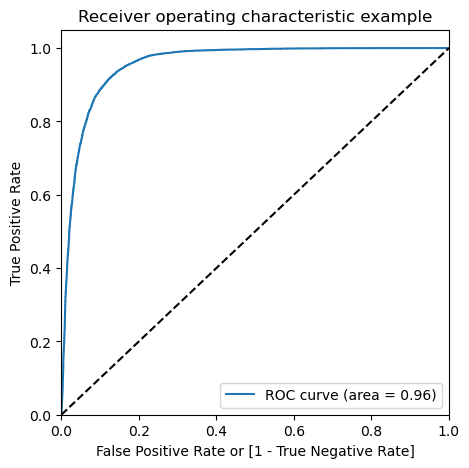

In [192]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.

### Testing the model on the test set

In [193]:
# with the copy of the test set
X_test_log = X_test.copy()

In [194]:
# only with the columns, which are selected in the train set after removing insignificant & multicollinear variables
X_test_log = X_test_log[log_cols]

In [195]:
# Adding constant to test set
X_test_sm = sm.add_constant(X_test_log)

##### Predictions on the test set with the final model

In [196]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [197]:
y_test_pred.head()

68986    0.070214
85420    0.017503
38082    0.704400
19625    0.020480
3513     0.001463
dtype: float64

In [198]:
# Converting y_test_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
68986,0.070214
85420,0.017503
38082,0.704400
19625,0.020480
3513,0.001463


In [199]:
# Convetting y_test to a dataframe
y_test_Tele_df = pd.DataFrame(y_test)
y_test_Tele_df.head()

,churn
68986,0
85420,0
38082,0
19625,0
3513,0


In [200]:
# Putting index to Customer ID 
y_test_Tele_df['CustID'] = y_test_Tele_df.index

In [201]:
# Removing index & merging dataframes side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_Tele_df.reset_index(drop=True, inplace=True)

In [202]:
# Appending y_pred_1 and y_test_Tele_df
y_test_pred_final = pd.concat([y_test_Tele_df, y_pred_1], axis=1)

In [203]:
y_test_pred_final.head()

,churn,CustID,0
0,0,68986,0.070214
1,0,85420,0.017503
2,0,38082,0.704400
3,0,19625,0.020480
4,0,3513,0.001463


In [204]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [205]:
# Rearranging the columns
# y_test_pred_final = y_test_pred_final.reindex_axis(['CustID','churn','churn_prob'], axis=1)

AttributeError: 'DataFrame' object has no attribute 'reindex_axis'

In [206]:
y_test_pred_final.head()

,churn,CustID,churn_prob
0,0,68986,0.070214
1,0,85420,0.017503
2,0,38082,0.704400
3,0,19625,0.020480
4,0,3513,0.001463


In [207]:
# using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [208]:
y_test_pred_final.head()

,churn,CustID,churn_prob,test_predicted
0,0,68986,0.070214,0
1,0,85420,0.017503,0
2,0,38082,0.704400,1
3,0,19625,0.020480,0
4,0,3513,0.001463,0


##### Metrics

In [209]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4516  732]
 [  27  131]]


In [210]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [211]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8596004439511654
Sensitivity:- 0.8291139240506329
Specificity:- 0.8605182926829268


***Model summary***

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.81
    - Specificity = 0.83
- Test set
    - Accuracy = 0.78
    - Sensitivity = 0.82
    - Specificity = 0.78
    
Overall, the model is performing well in the test set, basis it learning from the train set.

#### Final conclusion with no PCA

The logistic model with no PCA has good sensitivity and accuracy as per the analysis so far, which are comparable to the models with PCA. Hence, we can go for the more simplistic model such as logistic regression with PCA which expliains the important predictor variables as well as the significance of each variable. The model also helps us to identify the variables which should be act upon for making the decision on to be churned customers. Hence, the model is more relevant in terms of explaining to the business.

## Business recomendation

#### Top predictors

Below are few top variables selected in the logistic regression model.

| Variables   | Coefficients |
|---------------------|--------------|
|loc_ic_mou_8|-3.3287|
|og_others_7|-2.4711|
|ic_others_8|-1.5131|
|isd_og_mou_8|-1.3811|
|decrease_vbc_action|-1.3293|
|monthly_3g_8|-1.0943|
|std_ic_t2f_mou_8|-0.9503|
|monthly_2g_8|-0.9279|
|loc_ic_t2f_mou_8|-0.7102|
|roam_og_mou_8|0.7135|

We can see most of the top variables have negative coefficients, which means the variables are inversely correlated with the churn probablity.

E.g.:- If the local incoming MOU (loc_ic_mou_8) is lesser in the month of August than any other month, there are higher chances that the customer is likely to churn.

***Recomendations***

1. Target the customers, whose MOU of the incoming local calls & outgoing ISD calls are lesser in the action phase that mostly in the month of August
2. Target the customers, whose outgoing others charge in July & incoming others on August are less.
3. Target the customers having value based cost(VBC) in the action phase increased are more likely to churn compared to the other customers. Hence, these customers may be a good target to provide offer and retain.
4. Cutomers with higher monthly 3G recharge in August is more are likely to be churned. 
5. Customers having decreasing STD incoming MOU for operators for the month of August are also more likely to churn.
6. Cutomers decreasing monthly 2G usage for August are also expected to churn.
7. Customers having decreasing incoming MOU for August are more likely to churn.
8. roam_og_mou_8 variables have positive coefficients (0.7135) which is a sign that whose roaming outgoing minutes of usage is increasing are more likely to churn.


#### Plots of important predictors for churn and non churn customers

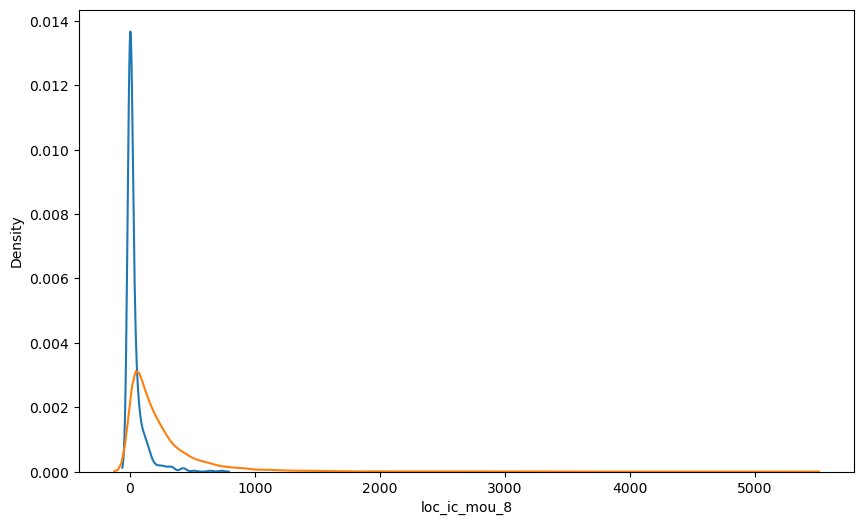

In [212]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers the MOU for the month of August is mostly populated on the lower side than the non churn customers.

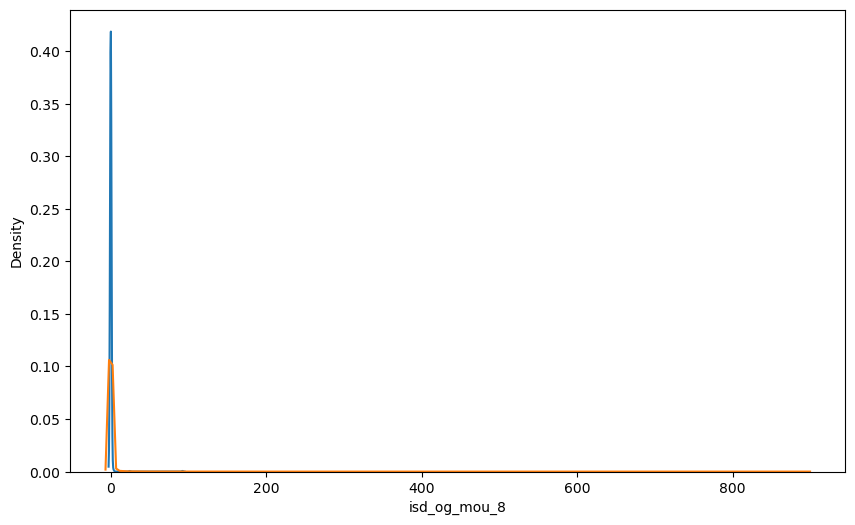

In [213]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()

We can see that the ISD outgoing MOU for the month of August for churn customers is densed approximately to zero. Also the non churn customers it is little more than the churn customers.

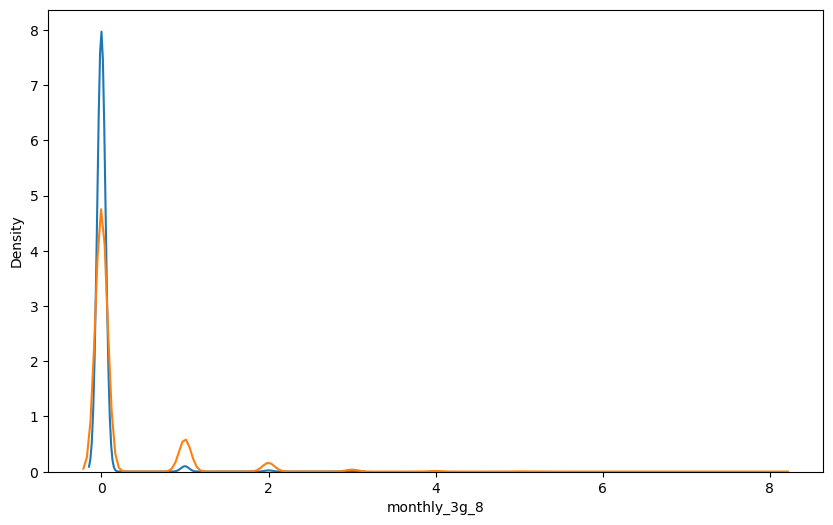

In [214]:
# Plotting monthly_3g_8 predictor for churn and not churn 
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.show()

The number of mothly 3g data for August for the churn customers are more populated aroud 1, whereas of non churn customers  spreaded accross various numbers.

